# Projet : Anticiper les besoins en consommation de bâtiments : Notebook1 d'exploration des données

In [1]:
## Importation des librairies nécessaires
import pandas as pd
import numpy as np

In [2]:
## Importation des librairies supplémentaires utiles
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
## Chargement des données
buildingEnergy = pd.read_csv("2016_Building_Energy_Benchmarking.csv",sep=",",low_memory=False)

In [4]:
## Observation rapide des données
buildingEnergy.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

# Exploration des données

In [5]:
buildingEnergy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
buildingEnergy["OSEBuildingID"].unique().shape

(3376,)

In [7]:
buildingEnergy["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

'''En observant les types de bâtiment, nous constatons que les bâtiments destinés aux habiitations sont identifiables car ils
contiennent le terme 'Multifamily'.
Nous allons donc sélectionner tous les autres types de bâtiment sauf ceux contenant l'expression 'Multifamily'. C'est sur cette sélection que nos travaux
doivent se porter selon la mission qui nous a été confiée'''

In [8]:
# Sélection des bâtiments non destinés à l'habitation

buildingEnergy = buildingEnergy.loc[~buildingEnergy['BuildingType'].str.contains('Multifamily', case=False, na=False),:]

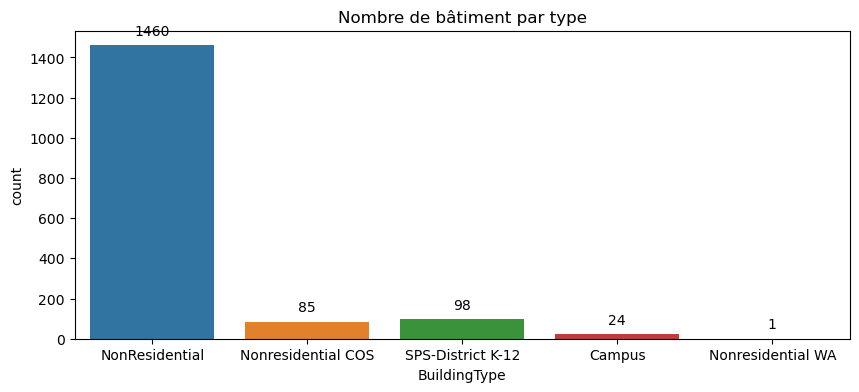

In [9]:
# Visualisation graphique
plt.figure(figsize=(10,4))
ax = sns.countplot(x="BuildingType", data=buildingEnergy, hue ="BuildingType")
plt.title("Nombre de bâtiment par type")

for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [10]:
# Du fait de leur caractète atypique (présence de multiples bâtiments pour un campus), nous décidons d'écater les bâtiments de type 'Campus' de la base de données ainsi que le type 'Nonresidential WA' qui ne comporte qu'une seule occurrence


buildingEnergy = buildingEnergy.loc[~buildingEnergy['BuildingType'].str.contains('Campus', case=False, na=False),:]

buildingEnergy = buildingEnergy.loc[~buildingEnergy['BuildingType'].str.contains('Nonresidential WA', case=False, na=False),:]

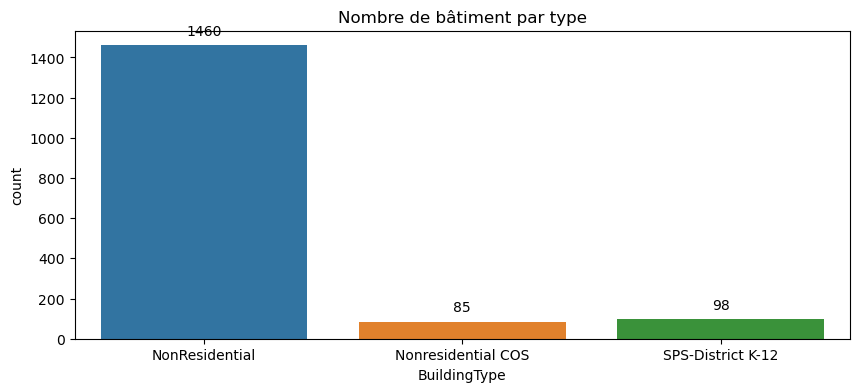

In [11]:
# Visualisation graphique après suppression
plt.figure(figsize=(10,4))
ax = sns.countplot(x="BuildingType", data=buildingEnergy, hue ="BuildingType")
plt.title("Nombre de bâtiment par type")

for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [12]:
# Affichage d'éventuels doublons : Un OSEBuildingID apparaît-il plusieurs fois dans le jeu de données?

buildingEnergy[buildingEnergy.duplicated(["OSEBuildingID"])]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, Comments, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

[0 rows x 46 columns]

# Traitement des données manquantes

In [13]:
# Tableau des valeurs manquantes par variables

missing_values = buildingEnergy.isnull().sum()
missing_percent = round((missing_values/len(buildingEnergy))*100,3)
missing_table = pd.DataFrame({"Missing Values":missing_values,"Percentage":missing_percent})
print(missing_table)

                                 Missing Values  Percentage
OSEBuildingID                                 0       0.000
DataYear                                      0       0.000
BuildingType                                  0       0.000
PrimaryPropertyType                           0       0.000
PropertyName                                  0       0.000
Address                                       0       0.000
City                                          0       0.000
State                                         0       0.000
ZipCode                                      16       0.974
TaxParcelIdentificationNumber                 0       0.000
CouncilDistrictCode                           0       0.000
Neighborhood                                  0       0.000
Latitude                                      0       0.000
Longitude                                     0       0.000
YearBuilt                                     0       0.000
NumberofBuildings                       

<Axes: >

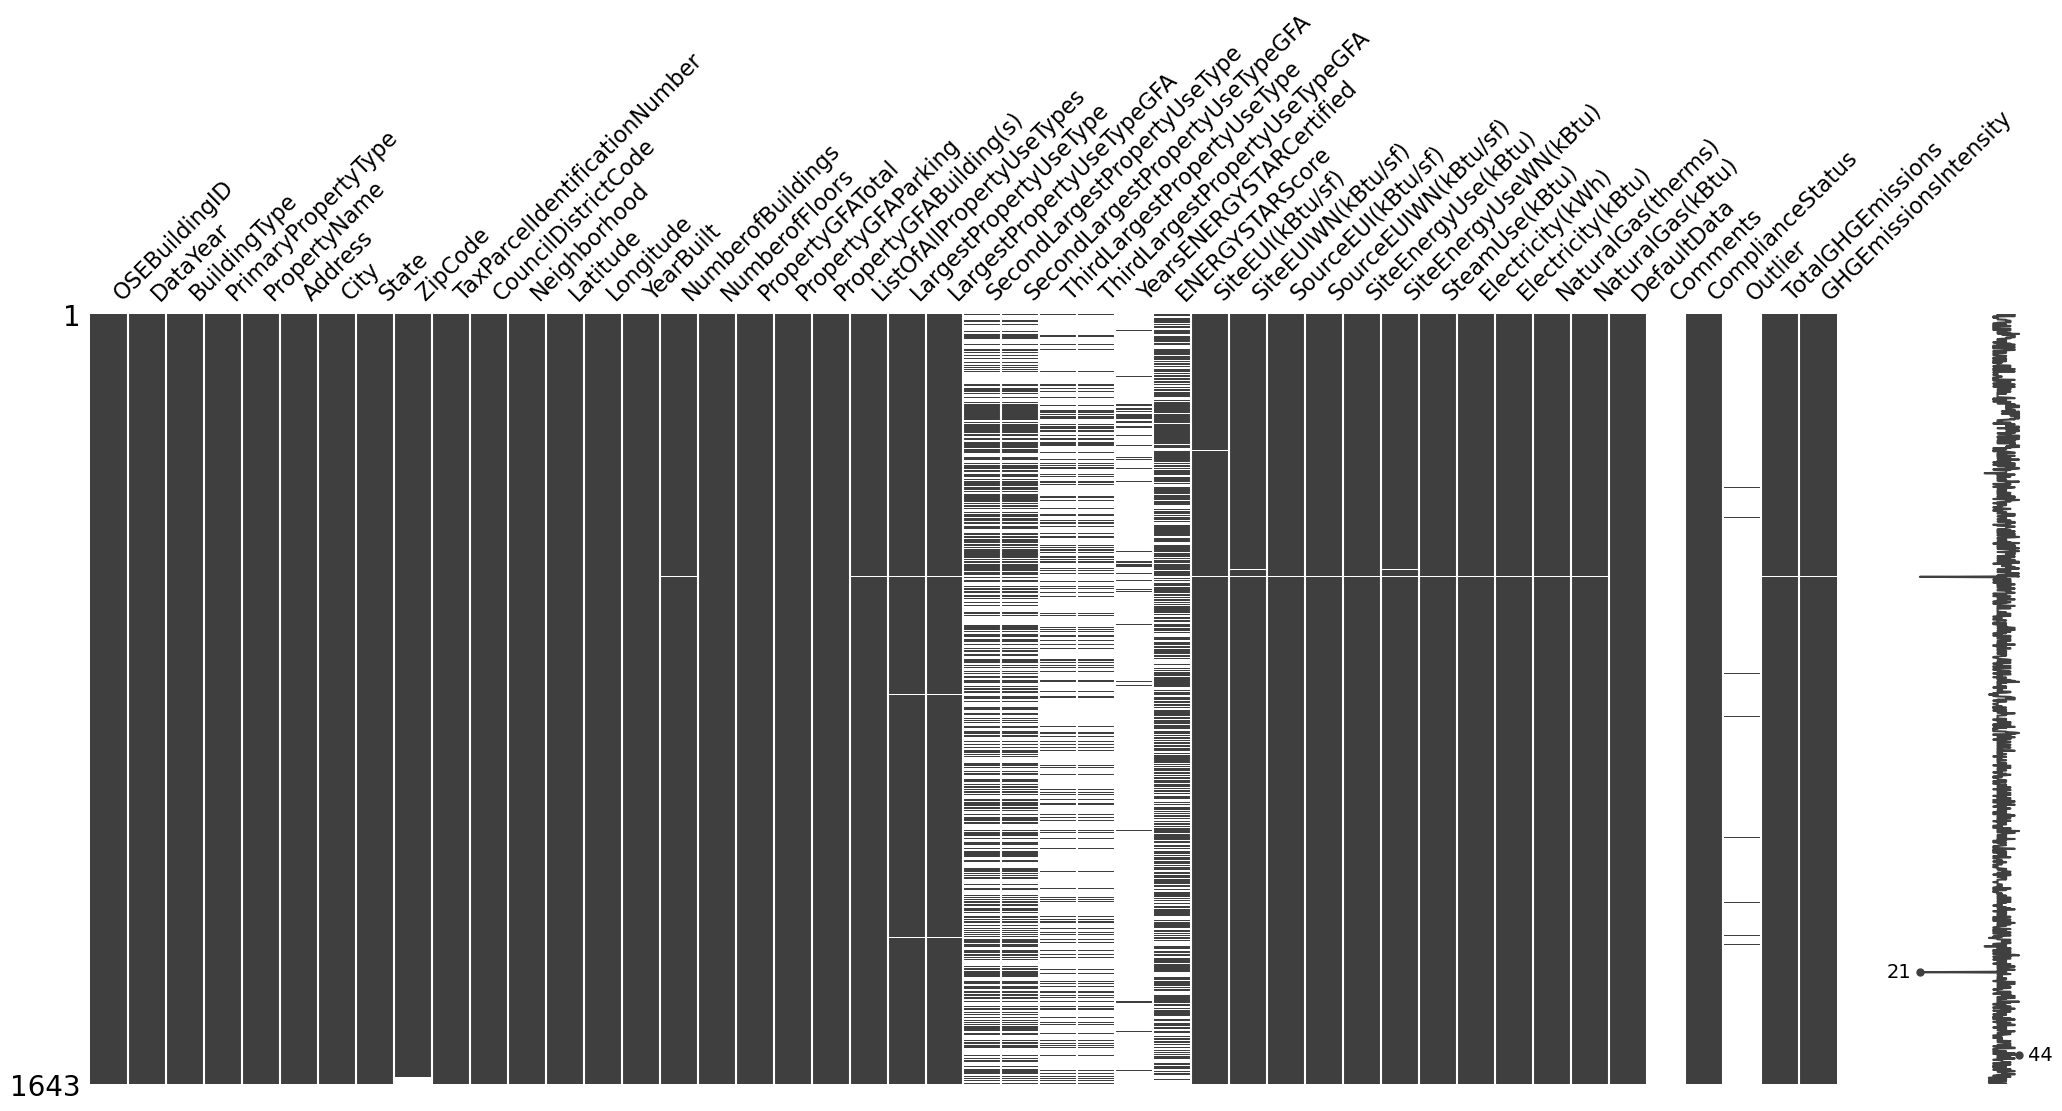

In [14]:
# Visualisation des valeurs manquantes avec missingno

msno.matrix(buildingEnergy)

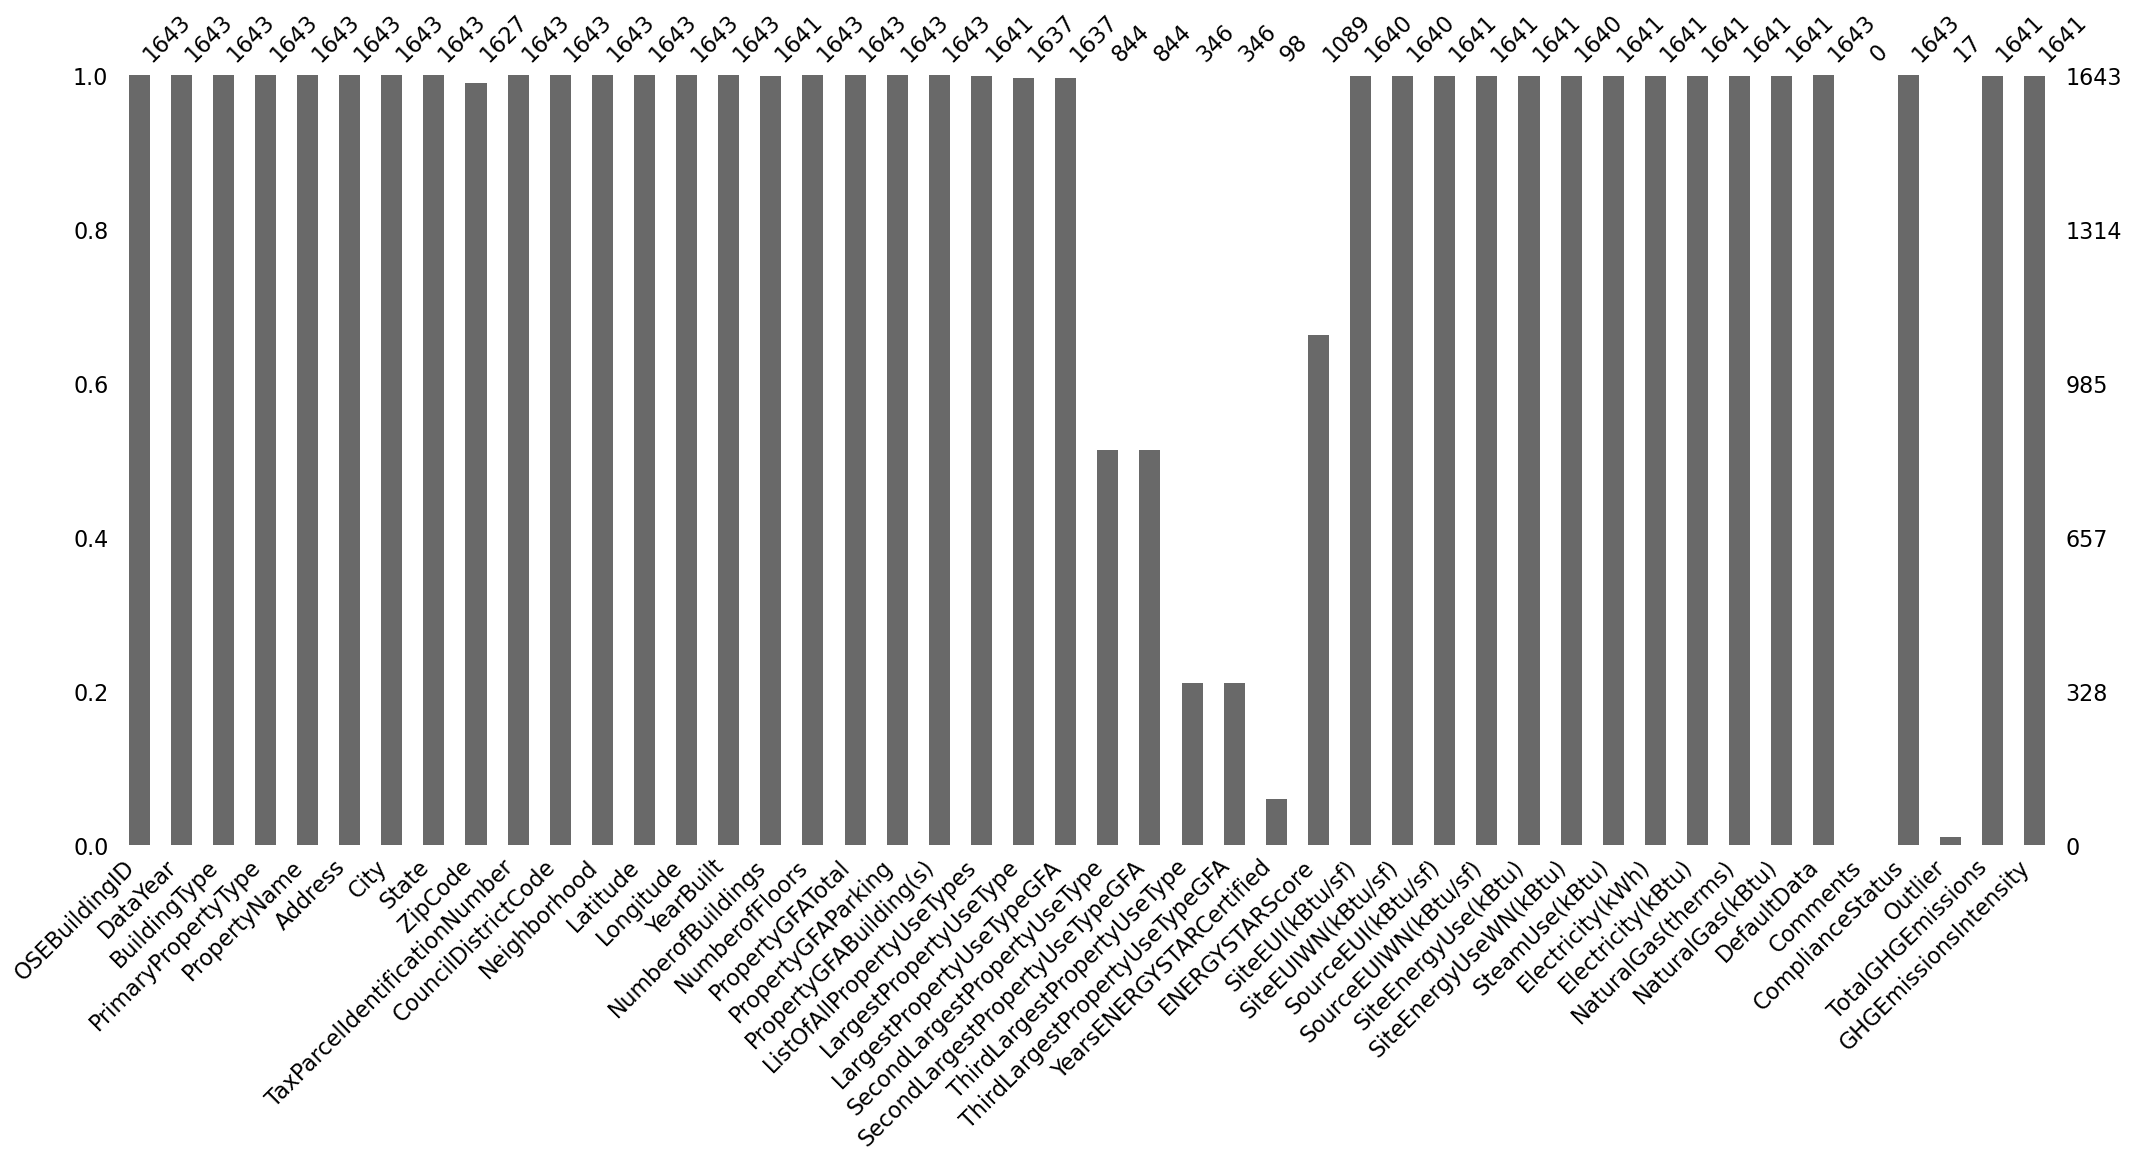

In [15]:
msno.bar(buildingEnergy)
plt.show()

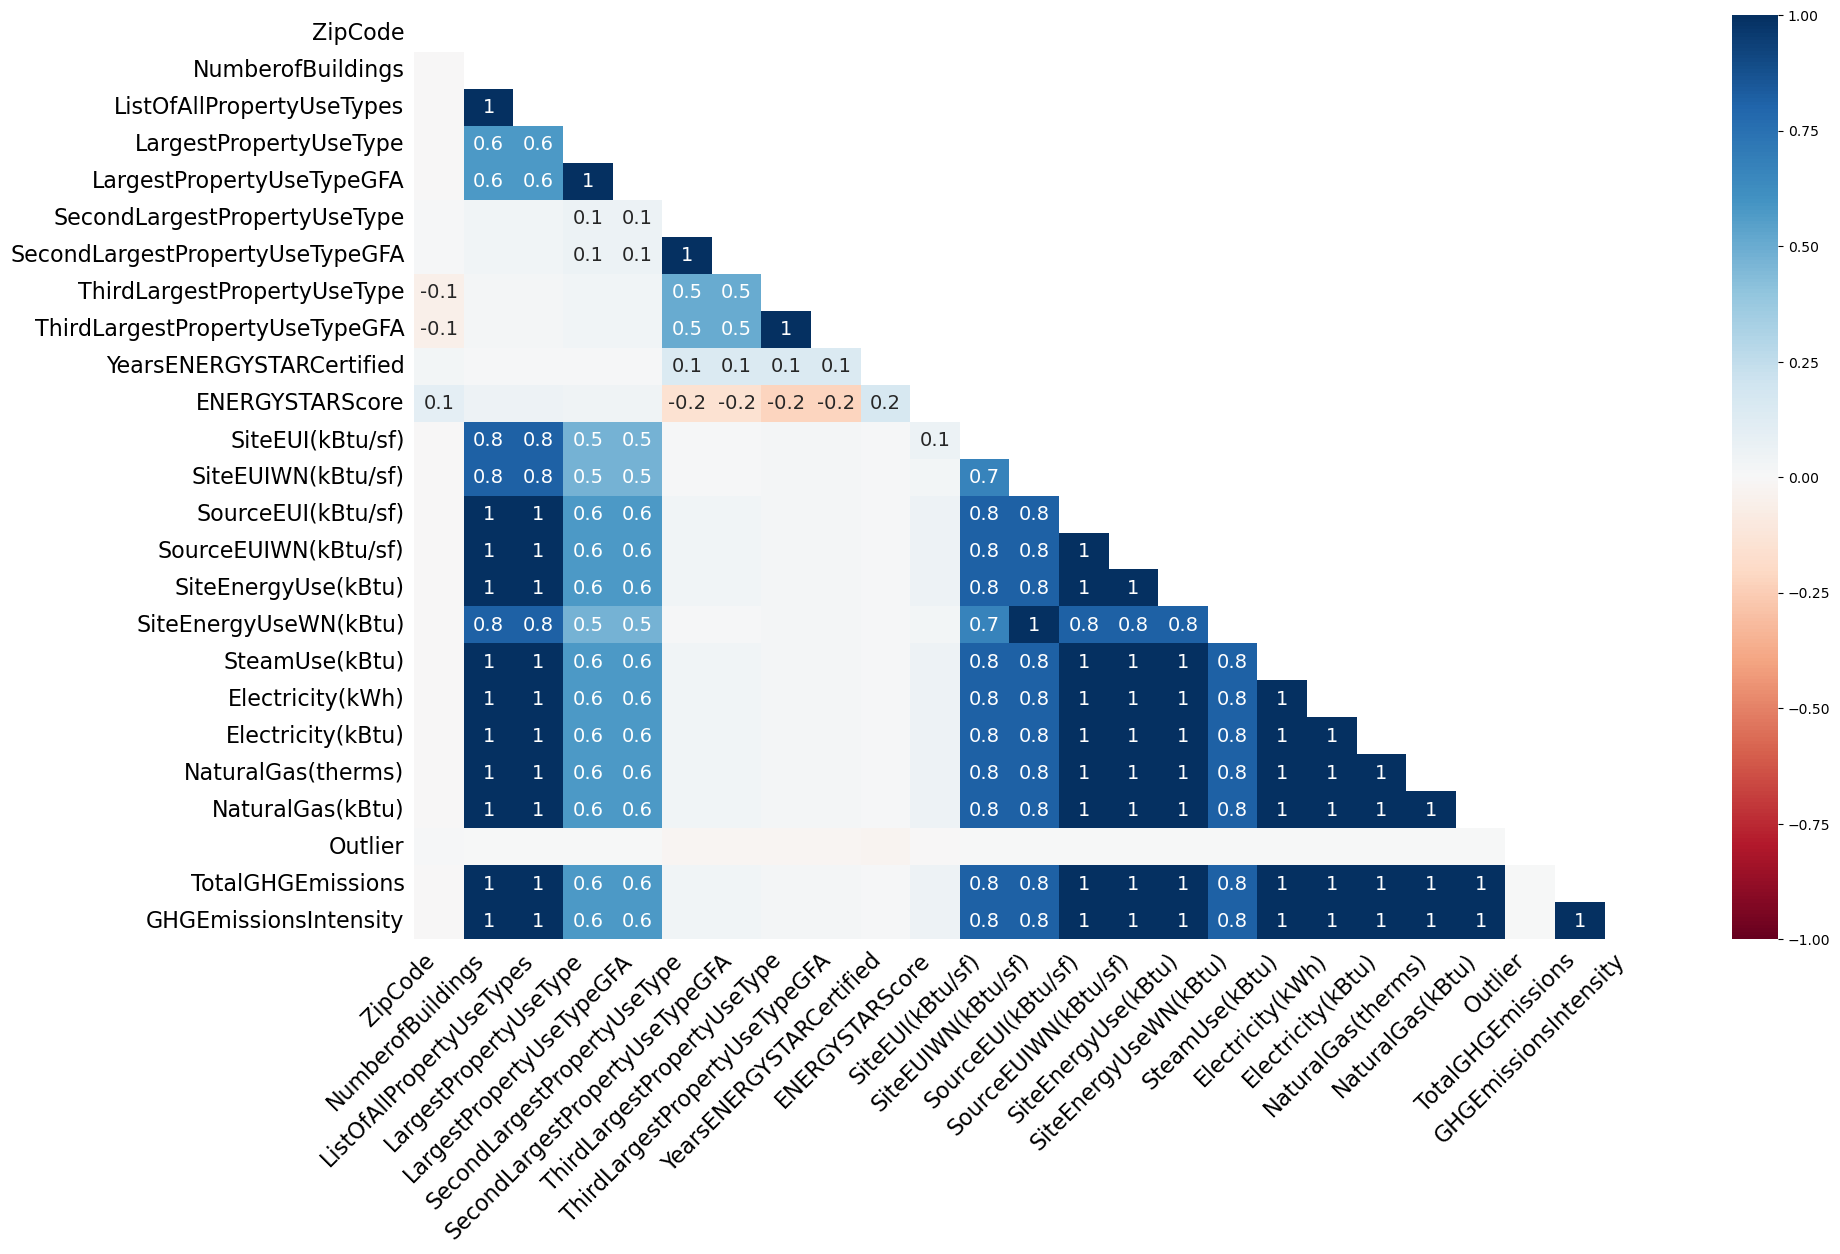

In [16]:
msno.heatmap(buildingEnergy)
plt.show()

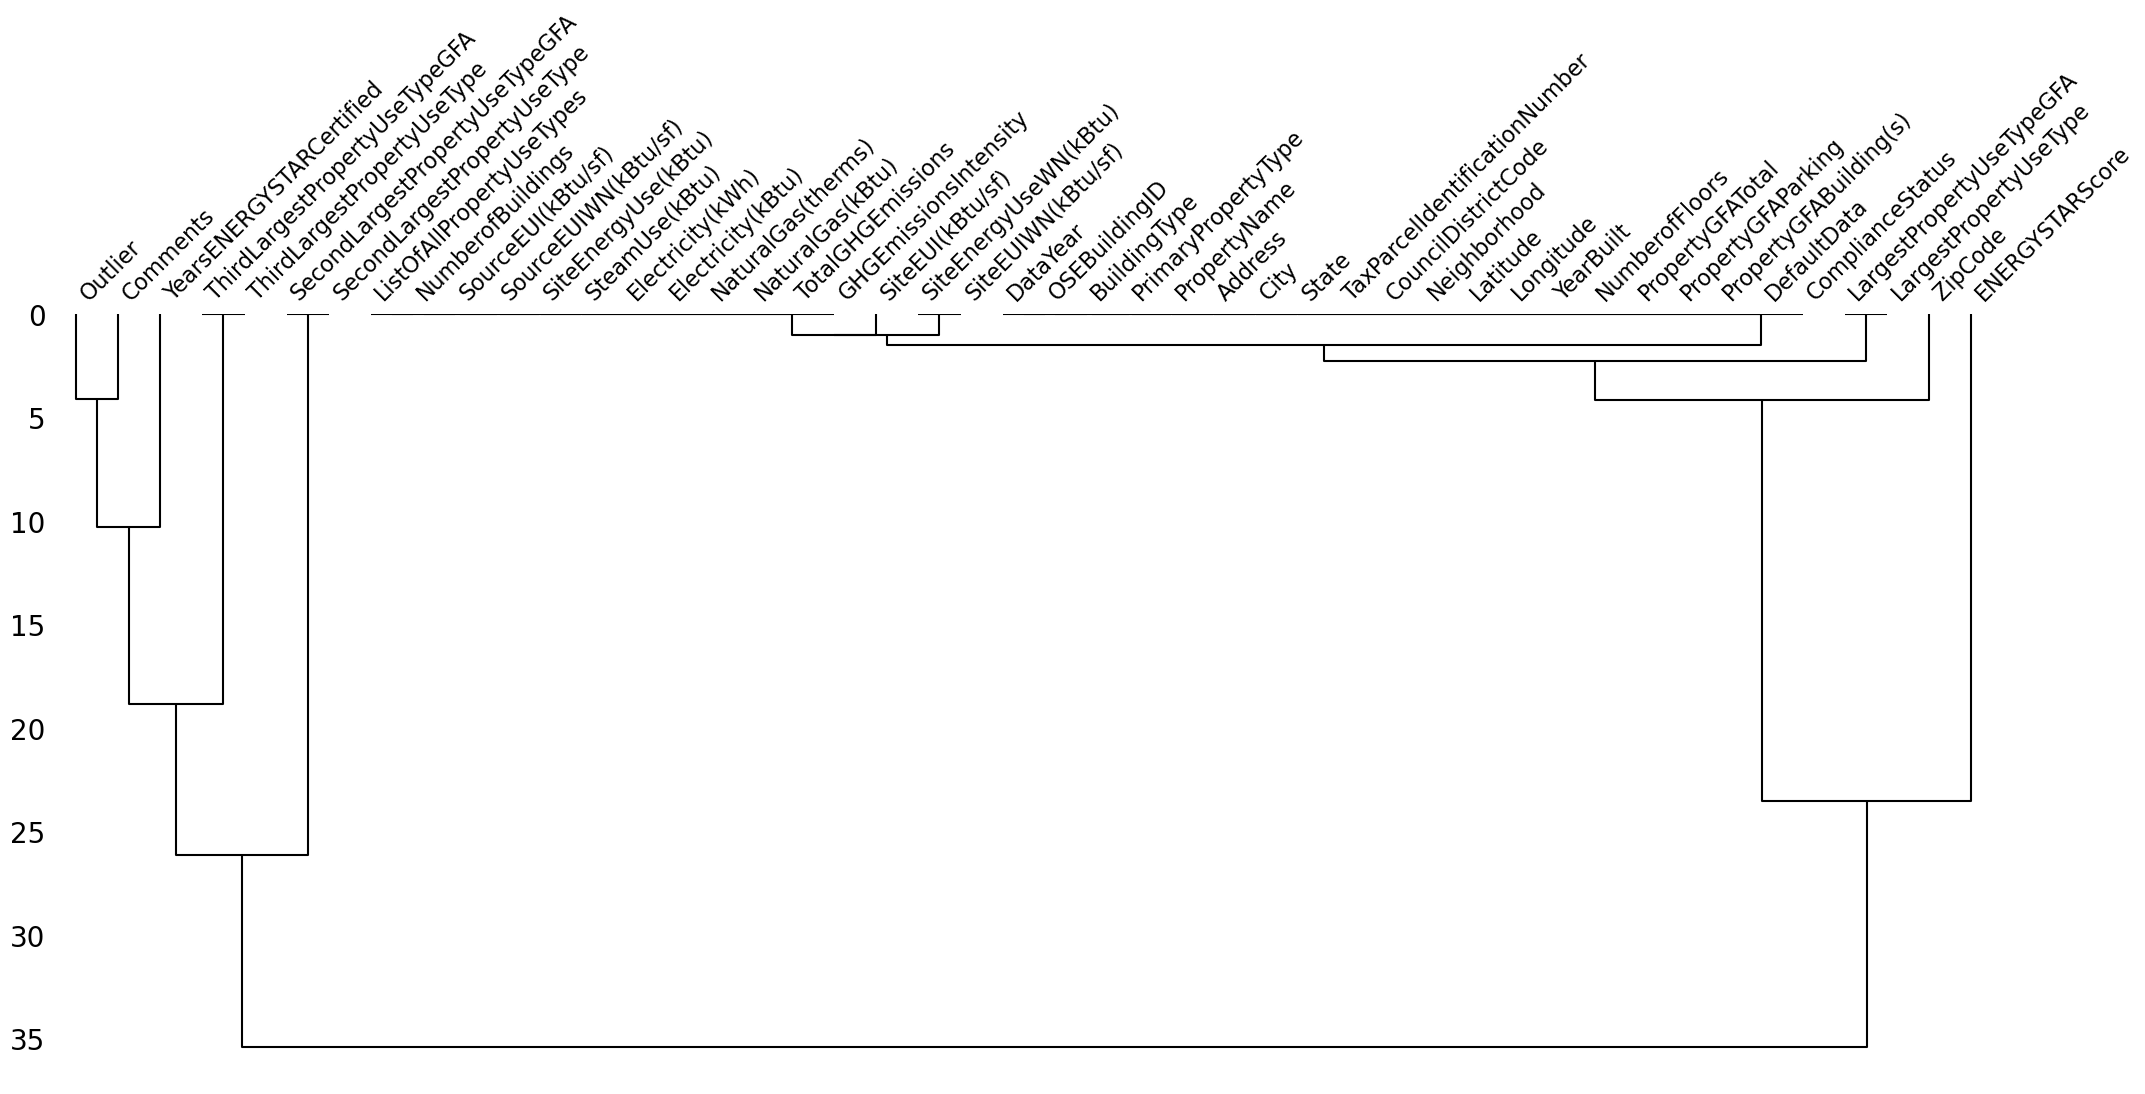

In [17]:
# Analyse des corrélations entre les valeurs manquantes

msno.dendrogram(buildingEnergy)
plt.show()

C:\Users\tykap\AppData\Local\Temp\ipykernel_17868\2099870269.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(missing_proportions.index, rotation=90)


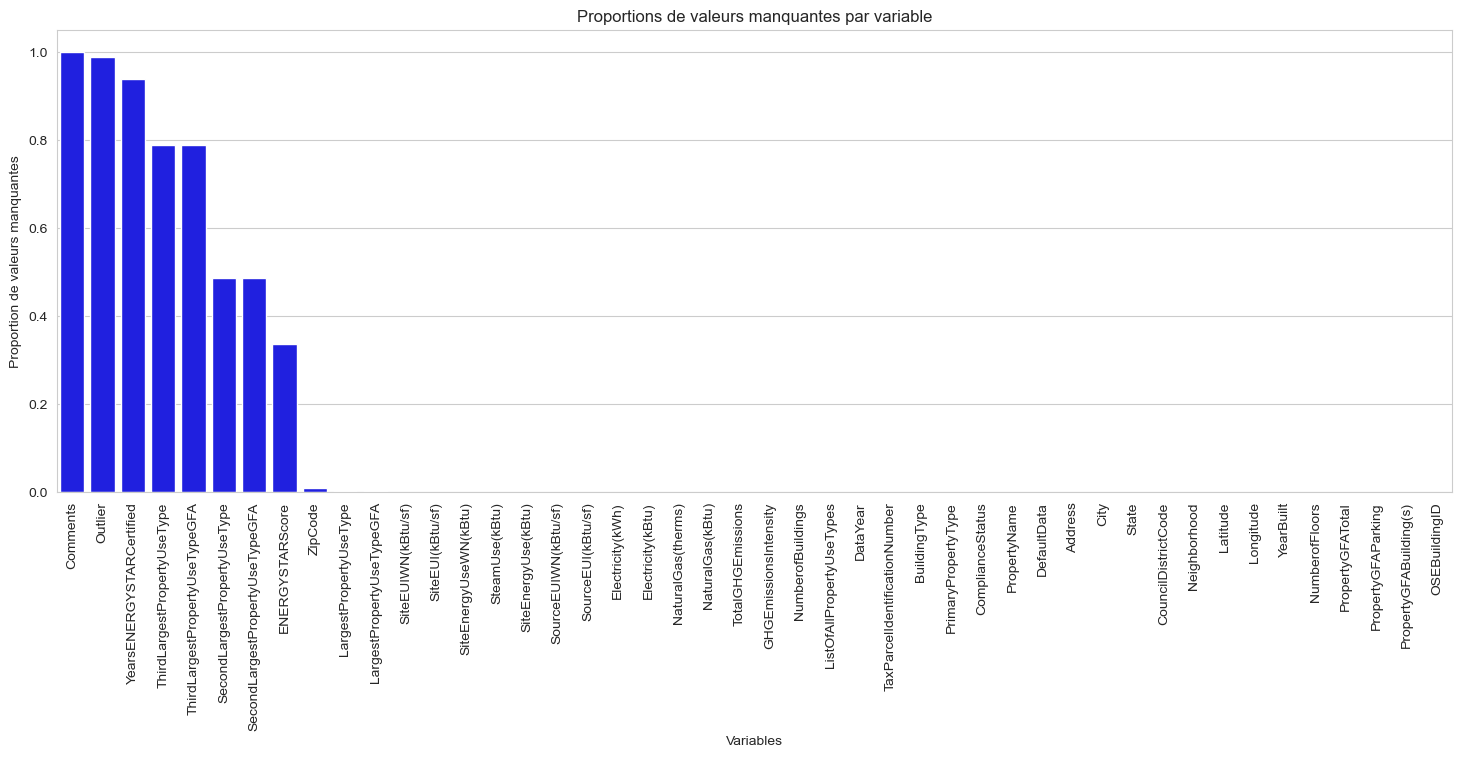

In [18]:
# Calcul et visualisation de la proportion des valeurs manquantes pour chaque varaible

missing_proportions = buildingEnergy.isnull().mean().sort_values(ascending=False)

# Création du graphique avec Seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x=missing_proportions.index, y=missing_proportions.values, ax=ax, color='blue')
ax.set_xlabel('Variables')
ax.set_ylabel('Proportion de valeurs manquantes')
ax.set_xticklabels(missing_proportions.index, rotation=90)
ax.set_title('Proportions de valeurs manquantes par variable')
plt.show()

In [19]:
buildingEnergy.loc[buildingEnergy['NumberofBuildings'].isna(),:]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
578             773      2016  NonResidential  Small- and Mid-Sized Office   
2670          26532      2016  NonResidential           Mixed Use Property   

          PropertyName                 Address     City State  ZipCode  \
578   SEATTLE BUILDING         215 COLUMBIA ST  Seattle    WA  98104.0   
2670  KALBERG BUILDING  4515 UNIVERSITY WAY NE  Seattle    WA  98105.0   

     TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
578                     0939000245  ...               NaN               NaN   
2670                    8816401120  ...               NaN               NaN   

      NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
578                  NaN               NaN        False       NaN   
2670                 NaN               NaN        False       NaN   

      ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
578      Non-Compliant      NaN                NaN                    NaN  
2670     Non-Compliant      NaN                NaN                    NaN  

[2 rows x 46 columns]

''' Nous constatons que les bâtiments pour lesquels nous n'avons pas le NumberofBuildings, nous n'avons pas non plus la consommation en énergie ni l'émission GES ni même leur ENERGYSTARScore.
Nous décidons de les supprimer'''

In [20]:
buildingEnergy = buildingEnergy.dropna(subset=['NumberofBuildings'])

'''Pour les données manquantes en LargestPropertyUseType, nous décidons de les supprimer'''

In [21]:
buildingEnergy.loc[buildingEnergy['LargestPropertyUseType'].isna(),:]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
353             496      2016  NonResidential        Self-Storage Facility   
1147          21103      2016  NonResidential                        Hotel   
2414          25568      2016  NonResidential  Small- and Mid-Sized Office   
2459          25711      2016  NonResidential                   Restaurant   

                          PropertyName                Address     City State  \
353                   Market St Center  2811 NW Market Street  Seattle    WA   
1147                   Palladian Hotel     2000 Second Avenue  Seattle    WA   
2414               Talon Northlake LLC   1341 N Northlake Way  Seattle    WA   
2459  BUSH GARDEN - RESTURANT & LOUNGE    614 S MAYNARD AVE S  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
353   98107.0                    1175001235  ...       881452.0000   
1147  98121.0                    1977201140  ...       742846.3750   
2414  98103.0                    4088804565  ...       928526.0000   
2459  98104.0                    5247802410  ...       118085.2969   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
353          3007514.0        26899.582030         2689958.0        False   
1147         2534592.0         3624.875244          362488.0        False   
2414         3168131.0            0.000000               0.0        False   
2459          402907.0         4970.169922          497017.0        False   

      Comments  ComplianceStatus  Outlier  TotalGHGEmissions  \
353        NaN         Compliant      NaN             163.83   
1147       NaN         Compliant      NaN              36.92   
2414       NaN         Compliant      NaN              22.09   
2459       NaN         Compliant      NaN              29.21   

      GHGEmissionsIntensity  
353                    1.47  
1147                   0.60  
2414                   0.46  
2459                   1.01  

[4 rows x 46 columns]

In [22]:
buildingEnergy = buildingEnergy.dropna(subset=['LargestPropertyUseType'])

'''Pour les données manquantes de la variable 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA' , nous l'imputons à 0'''

In [23]:
buildingEnergy.loc[buildingEnergy["SecondLargestPropertyUseTypeGFA"].isna(), "SecondLargestPropertyUseTypeGFA"] = 0
buildingEnergy.loc[buildingEnergy["ThirdLargestPropertyUseTypeGFA"].isna(), "ThirdLargestPropertyUseTypeGFA"] = 0

'''Pour les valeur manquantes de la variable ENERGYSTARScore, nous décidons de les imputer via KNN'''

In [24]:
# Reinitialisation de l'index pour faciliter notre traitement
buildingEnergy = buildingEnergy.reset_index(drop=True)

In [25]:
from sklearn.impute import KNNImputer

In [26]:
# Imputation des valeurs manquantes ENERGYSTARScore via KNN

# Nous séparons les données pour ne conserver que les variables numériquees comprenant la variable à imputer
         

NewData = buildingEnergy.loc[:,['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking',
         'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
         'SiteEnergyUse(kBtu)','Electricity(kWh)','NaturalGas(therms)','TotalGHGEmissions','ENERGYSTARScore']]

In [27]:
# Nous créons knn et choisissons d'imputer en fonction des 20 plus proches voisins

knn = KNNImputer(n_neighbors =20, weights='distance')

In [28]:
# Nous appliquons la méthode définie, afin de réaliser les imputations

NewData_trf = knn.fit_transform(NewData)

In [29]:
# Nous créons un dataframe qui recevra l'ensemble des valeurs imputées

NewData_trf = pd.DataFrame(data=NewData_trf,columns= NewData.columns)

In [30]:
# Nous récupérons les valeurs y compris les valeurs imputées pour les intégrer à notre dataframe initial 

buildingEnergy['ENERGYSTARScore'] = round(NewData_trf['ENERGYSTARScore'],0)

In [31]:
# Création d'une nouvelle variable l'âge du bâtiment que nous appelons BuildingAge

buildingEnergy["BuildingAge"] = buildingEnergy["DataYear"]- buildingEnergy["YearBuilt"]

In [32]:
# Création de nouvelles varaibles correspondant à la proportion d'utilisation de chaque type d'énergie pour chaque bâtiment.

buildingEnergy["SteamUse_ratio"] = buildingEnergy["SteamUse(kBtu)"] / buildingEnergy["SiteEnergyUse(kBtu)"]
buildingEnergy["Electricity_ratio"] = buildingEnergy["Electricity(kBtu)"] / buildingEnergy["SiteEnergyUse(kBtu)"]
buildingEnergy["NaturalGas_ratio"] = buildingEnergy["NaturalGas(kBtu)"] / buildingEnergy["SiteEnergyUse(kBtu)"]


In [33]:
# Suppression des bâtiments pour lesquels nous des valeurs manquantes au niveau de ces nouvelles variables

buildingEnergy = buildingEnergy.dropna(subset=["SteamUse_ratio","Electricity_ratio","NaturalGas_ratio"])

In [34]:
# Convertir la variable ZipcCode et CouncilDistrictCode mentionnées comme de type numérique en type catégoriel

buildingEnergy["ZipCode"] = buildingEnergy["ZipCode"].apply(str)
buildingEnergy["CouncilDistrictCode"] = buildingEnergy["CouncilDistrictCode"].apply(str)
buildingEnergy["OSEBuildingID"] = buildingEnergy["OSEBuildingID"].apply(str)

In [35]:
# Suppression des variables sans intérêts pour notre analyse, variables non structurelles pour les bâtiments, variables transformées.

col_to_delete = ['DataYear','PrimaryPropertyType','PropertyName','Address','City','State',
                 'TaxParcelIdentificationNumber','CouncilDistrictCode','Neighborhood','ZipCode',
                 'YearBuilt','ListOfAllPropertyUseTypes','SecondLargestPropertyUseType',
                 'ThirdLargestPropertyUseType','YearsENERGYSTARCertified','Comments',
                'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
                'SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)',
                 'NaturalGas(therms)','NaturalGas(kBtu)','DefaultData','ComplianceStatus',
                 'Outlier','GHGEmissionsIntensity']

buildingEnergy.drop(columns=col_to_delete, inplace=True)

In [36]:
# Tableau des valeurs manquantes par variables

missing_values = buildingEnergy.isnull().sum()
missing_percent = round((missing_values/len(buildingEnergy))*100,3)
missing_table = pd.DataFrame({"Missing Values":missing_values,"Percentage":missing_percent})
print(missing_table)

                                 Missing Values  Percentage
OSEBuildingID                                 0         0.0
BuildingType                                  0         0.0
Latitude                                      0         0.0
Longitude                                     0         0.0
NumberofBuildings                             0         0.0
NumberofFloors                                0         0.0
PropertyGFATotal                              0         0.0
PropertyGFAParking                            0         0.0
PropertyGFABuilding(s)                        0         0.0
LargestPropertyUseType                        0         0.0
LargestPropertyUseTypeGFA                     0         0.0
SecondLargestPropertyUseTypeGFA               0         0.0
ThirdLargestPropertyUseTypeGFA                0         0.0
ENERGYSTARScore                               0         0.0
SiteEnergyUse(kBtu)                           0         0.0
TotalGHGEmissions                       

# Préparation des données

In [37]:
buildingEnergy.describe()

Latitude    Longitude  NumberofBuildings  NumberofFloors  \
count  1621.000000  1621.000000        1621.000000     1621.000000   
mean     47.615979  -122.332887           1.033930        4.168415   
std       0.048026     0.024494           0.555074        6.644455   
min      47.499170  -122.411820           0.000000        0.000000   
25%      47.585280  -122.343180           1.000000        1.000000   
50%      47.612400  -122.332940           1.000000        2.000000   
75%      47.649420  -122.321800           1.000000        4.000000   
max      47.733870  -122.258640           9.000000       99.000000   

       PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count      1.621000e+03         1621.000000            1.621000e+03   
mean       1.103964e+05        13183.423812            9.721301e+04   
std        1.850563e+05        42755.604473            1.619564e+05   
min        1.128500e+04            0.000000            3.636000e+03   
25%        2.925800e+04            0.000000            2.829600e+04   
50%        4.878900e+04            0.000000            4.656000e+04   
75%        1.030000e+05            0.000000            9.355500e+04   
max        1.952220e+06       512608.000000            1.765970e+06   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count               1.621000e+03                      1621.000000   
mean                9.006100e+04                     18170.310485   
std                 1.511526e+05                     48229.498291   
min                 5.656000e+03                         0.000000   
25%                 2.545000e+04                         0.000000   
50%                 4.300000e+04                         0.000000   
75%                 8.939200e+04                     12876.000000   
max                 1.680937e+06                    441551.000000   

       ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
count                     1621.000000      1621.000000         1.621000e+03   
mean                      2874.810240        65.152375         7.458970e+06   
std                      14034.212518        24.212426         1.824394e+07   
min                          0.000000         1.000000         1.680890e+04   
25%                          0.000000        54.000000         1.244150e+06   
50%                          0.000000        69.000000         2.547848e+06   
75%                          0.000000        83.000000         6.858534e+06   
max                     303910.000000       100.000000         2.930908e+08   

       TotalGHGEmissions  BuildingAge  SteamUse_ratio  Electricity_ratio  \
count        1621.000000  1621.000000     1621.000000        1621.000000   
mean          161.920321    54.125231        0.021223           0.696898   
std           557.550183    32.749965        0.091752           0.265323   
min            -0.800000     1.000000        0.000000          -0.336762   
25%            20.080000    27.000000        0.000000           0.485592   
50%            49.280000    51.000000        0.000000           0.696494   
75%           135.230000    86.000000        0.000000           0.999979   
max         12307.160000   116.000000        0.766987           1.000011   

       NaturalGas_ratio  
count       1621.000000  
mean           0.277854  
std            0.264570  
min            0.000000  
25%            0.000000  
50%            0.241065  
75%            0.492791  
max            1.000000

In [38]:
buildingEnergy.describe(include='object')

OSEBuildingID    BuildingType LargestPropertyUseType
count           1621            1621                   1621
unique          1621               3                     55
top                1  NonResidential                 Office
freq               1            1452                    495

In [39]:
# Identification des bâtiments ayant une consommation totale d'énergie inférieure à 0

buildingEnergy.loc[buildingEnergy['TotalGHGEmissions']<0,:]

OSEBuildingID    BuildingType  Latitude  Longitude  NumberofBuildings  \
1577         49784  NonResidential  47.61432 -122.31257                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1577               6             52000                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  \
1577                   52000                 Office   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
1577                    48159.0                              0.0   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
1577                             0.0            100.0          342726.0938   

      TotalGHGEmissions  BuildingAge  SteamUse_ratio  Electricity_ratio  \
1577               -0.8            3             0.0          -0.336762   

      NaturalGas_ratio  
1577               0.0

In [40]:
# Suppression des bâtiments ayant une consommation totale d'énergie inférieure à 0

buildingEnergy.loc[buildingEnergy['TotalGHGEmissions']<0,'TotalGHGEmissions']= None
buildingEnergy = buildingEnergy.dropna(subset=['TotalGHGEmissions'])

In [41]:
# Utilisation de la variable 'OSEBuildingID' d'identitification des bâtiments comme index de notre data frame

buildingEnergy.set_index("OSEBuildingID", inplace=True)

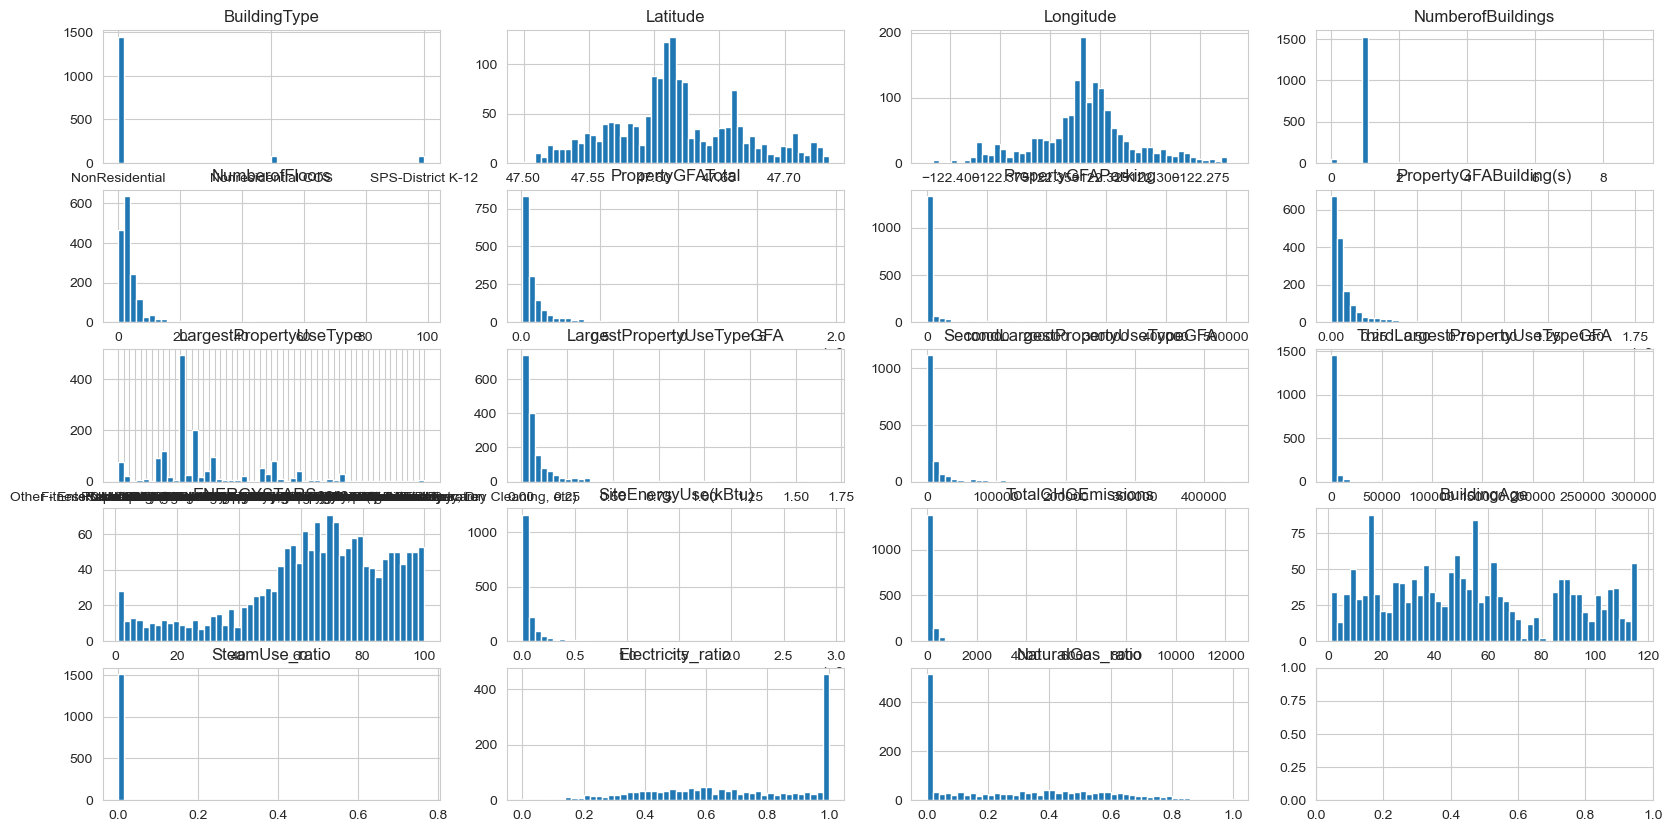

In [42]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(5,4,figsize=(20,10))
axs = axs.ravel()

for i, column in enumerate(buildingEnergy.columns):
    axs[i].hist(buildingEnergy[column], bins=50)
    axs[i].set_title(column)
plt.show()

In [43]:
data_num = buildingEnergy.select_dtypes(include=['float64','int64'])

------------------------------------------------------------------------------------------


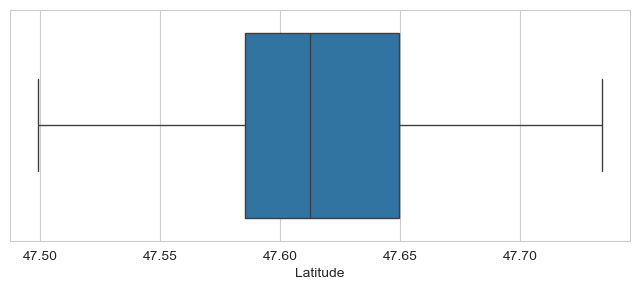

------------------------------------------------------------------------------------------


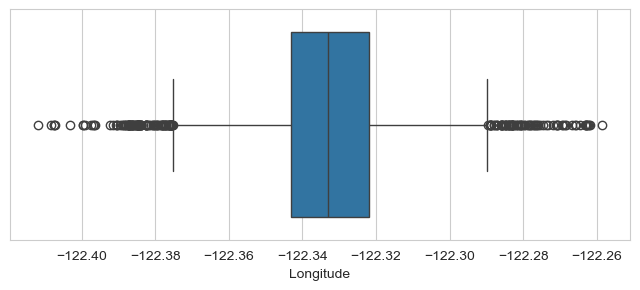

------------------------------------------------------------------------------------------


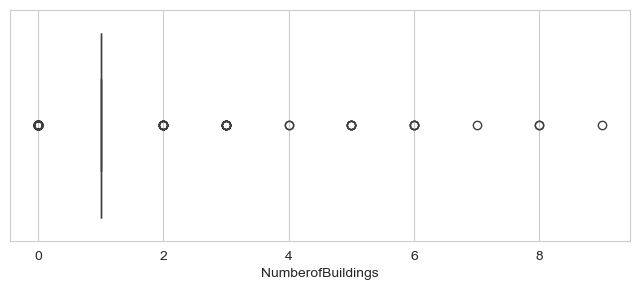

------------------------------------------------------------------------------------------


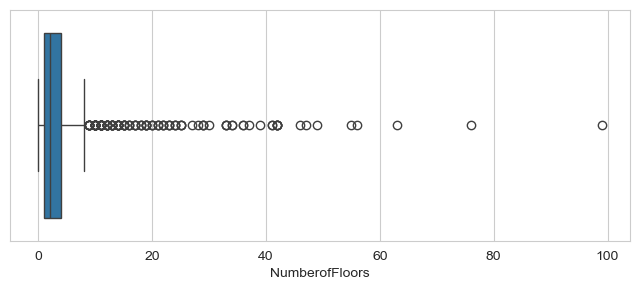

------------------------------------------------------------------------------------------


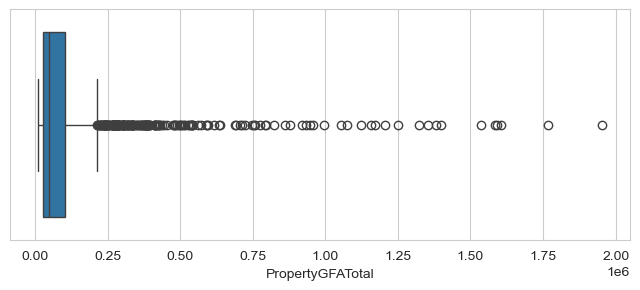

------------------------------------------------------------------------------------------


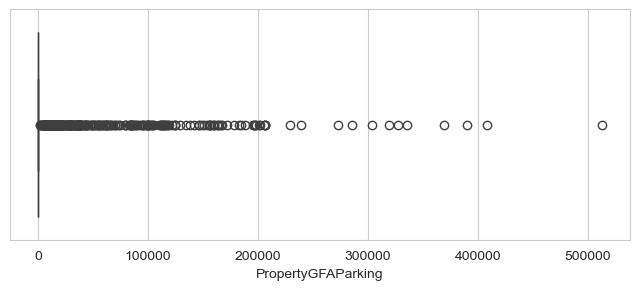

------------------------------------------------------------------------------------------


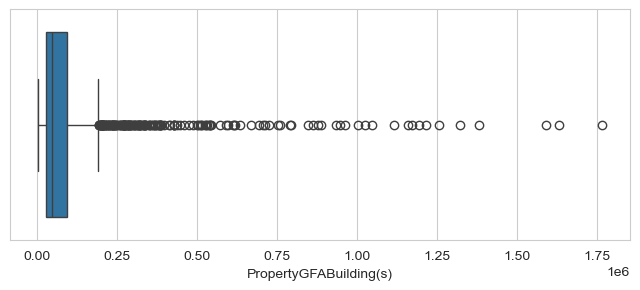

------------------------------------------------------------------------------------------


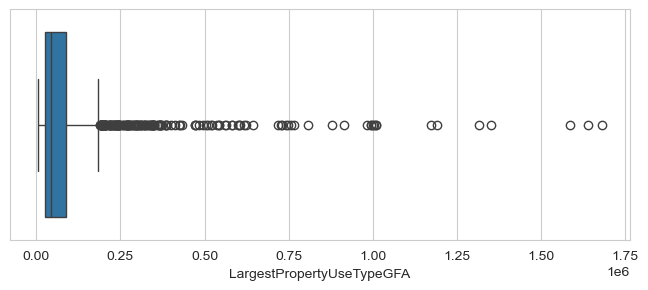

------------------------------------------------------------------------------------------


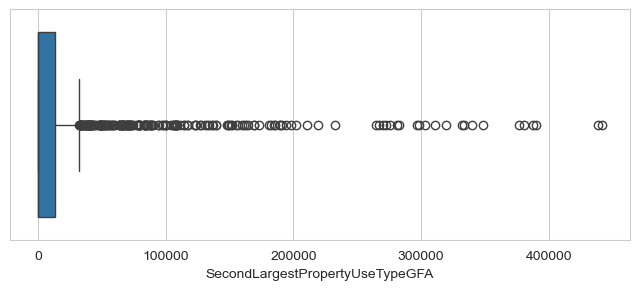

------------------------------------------------------------------------------------------


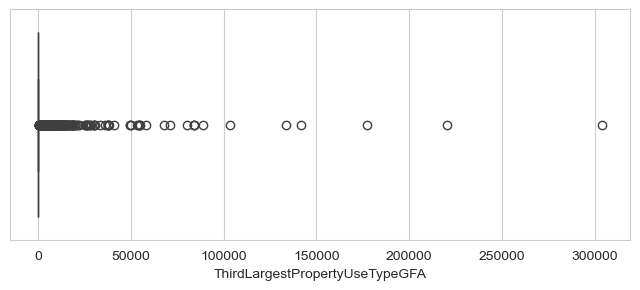

------------------------------------------------------------------------------------------


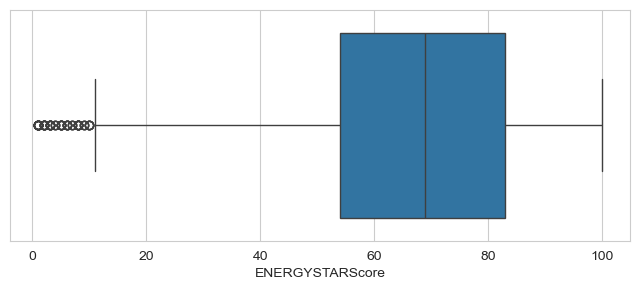

------------------------------------------------------------------------------------------


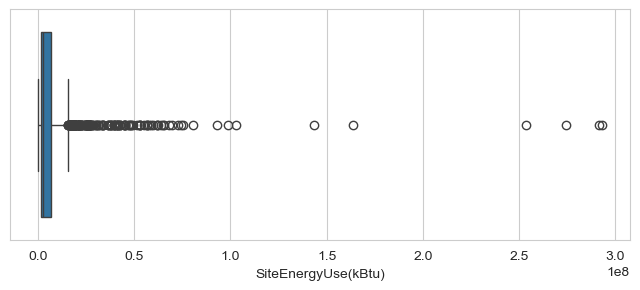

------------------------------------------------------------------------------------------


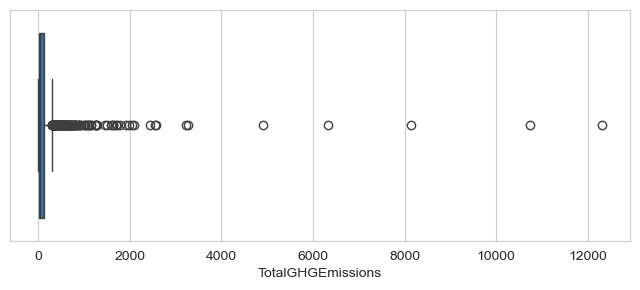

------------------------------------------------------------------------------------------


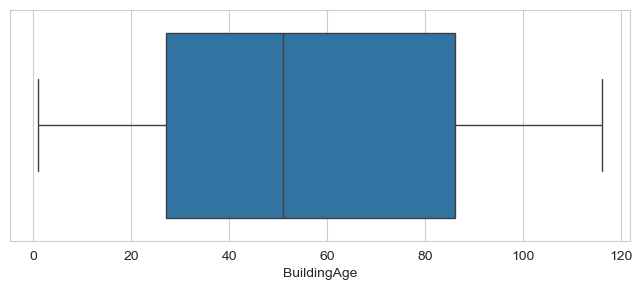

------------------------------------------------------------------------------------------


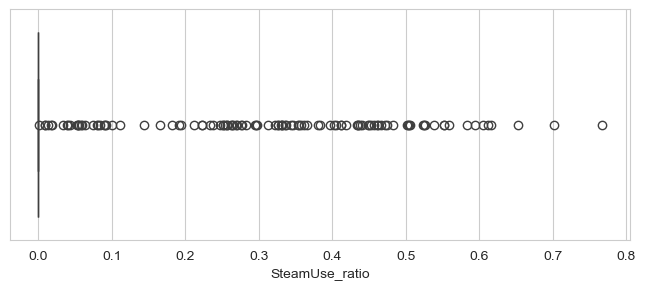

------------------------------------------------------------------------------------------


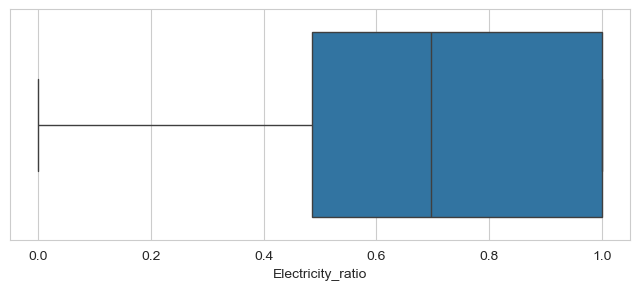

------------------------------------------------------------------------------------------


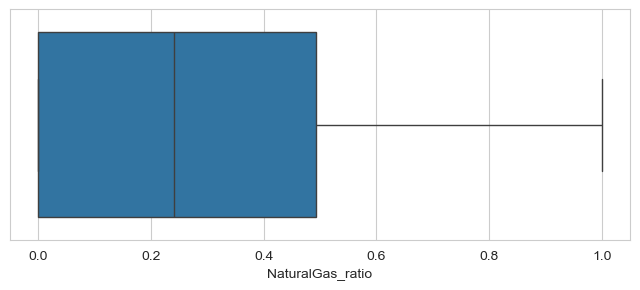

In [44]:
# Tracé des boxplots pour chaque variable pour visualiser les outliers

for column in data_num:
    fig, ax = plt.subplots(figsize=(8,3))
    sns.boxplot(x=data_num[column], ax=ax)
    print("-"*90)
    plt.show()

In [45]:
buildingEnergy.tail()

BuildingType  Latitude  Longitude  NumberofBuildings  \
OSEBuildingID                                                               
50222          Nonresidential COS  47.56722 -122.31154                1.0   
50223          Nonresidential COS  47.59625 -122.32283                1.0   
50224          Nonresidential COS  47.63644 -122.35784                1.0   
50225          Nonresidential COS  47.52832 -122.32431                1.0   
50226          Nonresidential COS  47.53939 -122.29536                1.0   

               NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
OSEBuildingID                                                         
50222                       1             12294                   0   
50223                       1             16000                   0   
50224                       1             13157                   0   
50225                       1             14101                   0   
50226                       1             18258                   0   

               PropertyGFABuilding(s) LargestPropertyUseType  \
OSEBuildingID                                                  
50222                           12294                 Office   
50223                           16000     Other - Recreation   
50224                           13157     Other - Recreation   
50225                           14101     Other - Recreation   
50226                           18258     Other - Recreation   

               LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                                               
50222                            12294.0                              0.0   
50223                            16000.0                              0.0   
50224                             7583.0                           5574.0   
50225                             6601.0                           6501.0   
50226                             8271.0                           8000.0   

               ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  \
OSEBuildingID                                                    
50222                                     0.0             46.0   
50223                                     0.0             70.0   
50224                                     0.0             71.0   
50225                                   484.0             70.0   
50226                                  1108.0             62.0   

               SiteEnergyUse(kBtu)  TotalGHGEmissions  BuildingAge  \
OSEBuildingID                                                        
50222                 8.497457e+05              20.94           26   
50223                 9.502762e+05              32.17           12   
50224                 5.765898e+06             223.54           42   
50225                 7.194712e+05              22.11           27   
50226                 1.152896e+06              41.27           78   

               SteamUse_ratio  Electricity_ratio  NaturalGas_ratio  
OSEBuildingID                                                       
50222                     0.0           0.616974          0.383026  
50223                     0.0           0.417296          0.582704  
50224                     0.0           0.310820          0.689180  
50225                     0.0           0.484898          0.515102  
50226                     0.0           0.375189          0.624811

In [46]:
# Identification de traitement des valeur atypiques dans les variables cibles via le Z_Score

import scipy.stats as stats

#1. Dans la variable 'SiteEnergyUse(kBtu)'

buildingEnergy['Z_Energy'] = np.abs(stats.zscore(buildingEnergy["SiteEnergyUse(kBtu)"]))

#2. Dans la variable 'TotalGHGEmissions'

buildingEnergy['Z_GHGE'] = np.abs(stats.zscore(buildingEnergy["TotalGHGEmissions"]))

buildingEnergy

BuildingType  Latitude  Longitude  NumberofBuildings  \
OSEBuildingID                                                               
1                  NonResidential  47.61220 -122.33799                1.0   
2                  NonResidential  47.61317 -122.33393                1.0   
3                  NonResidential  47.61393 -122.33810                1.0   
5                  NonResidential  47.61412 -122.33664                1.0   
8                  NonResidential  47.61375 -122.34047                1.0   
...                           ...       ...        ...                ...   
50222          Nonresidential COS  47.56722 -122.31154                1.0   
50223          Nonresidential COS  47.59625 -122.32283                1.0   
50224          Nonresidential COS  47.63644 -122.35784                1.0   
50225          Nonresidential COS  47.52832 -122.32431                1.0   
50226          Nonresidential COS  47.53939 -122.29536                1.0   

               NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
OSEBuildingID                                                         
1                          12             88434                   0   
2                          11            103566               15064   
3                          41            956110              196718   
5                          10             61320                   0   
8                          18            175580               62000   
...                       ...               ...                 ...   
50222                       1             12294                   0   
50223                       1             16000                   0   
50224                       1             13157                   0   
50225                       1             14101                   0   
50226                       1             18258                   0   

               PropertyGFABuilding(s) LargestPropertyUseType  \
OSEBuildingID                                                  
1                               88434                  Hotel   
2                               88502                  Hotel   
3                              759392                  Hotel   
5                               61320                  Hotel   
8                              113580                  Hotel   
...                               ...                    ...   
50222                           12294                 Office   
50223                           16000     Other - Recreation   
50224                           13157     Other - Recreation   
50225                           14101     Other - Recreation   
50226                           18258     Other - Recreation   

               LargestPropertyUseTypeGFA  ...  ThirdLargestPropertyUseTypeGFA  \
OSEBuildingID                             ...                                   
1                                88434.0  ...                             0.0   
2                                83880.0  ...                          4622.0   
3                               756493.0  ...                             0.0   
5                                61320.0  ...                             0.0   
8                               123445.0  ...                             0.0   
...                                  ...  ...                             ...   
50222                            12294.0  ...                             0.0   
50223                            16000.0  ...                             0.0   
50224                             7583.0  ...                             0.0   
50225                             6601.0  ...                           484.0   
50226                             8271.0  ...                          1108.0   

               ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  \
OSEBuildingID                                                            
1                         60.0         7.226362e+06         

In [47]:
# Suppression des bâtiments ayant un Z_Score supérieurs à 3, ceux-ci par leur caractère trop atypique pourraient pertuber les modéles à construire.

threshold = 2

buildingEnergy.loc[buildingEnergy['Z_Energy']>threshold, ['Z_Energy']] = None
buildingEnergy.loc[buildingEnergy['Z_GHGE']>threshold, ['Z_GHGE']] = None

In [48]:
buildingEnergy = buildingEnergy.dropna(subset=['Z_Energy','Z_GHGE'])

In [49]:
missing_values = buildingEnergy.isnull().sum()
missing_percent = round((missing_values/len(buildingEnergy))*100,3)
missing_table = pd.DataFrame({"Missing Values":missing_values,"Percentage":missing_percent})
print(missing_table)

                                 Missing Values  Percentage
BuildingType                                  0         0.0
Latitude                                      0         0.0
Longitude                                     0         0.0
NumberofBuildings                             0         0.0
NumberofFloors                                0         0.0
PropertyGFATotal                              0         0.0
PropertyGFAParking                            0         0.0
PropertyGFABuilding(s)                        0         0.0
LargestPropertyUseType                        0         0.0
LargestPropertyUseTypeGFA                     0         0.0
SecondLargestPropertyUseTypeGFA               0         0.0
ThirdLargestPropertyUseTypeGFA                0         0.0
ENERGYSTARScore                               0         0.0
SiteEnergyUse(kBtu)                           0         0.0
TotalGHGEmissions                             0         0.0
BuildingAge                             

In [50]:
# Suppression des variables 'Z_Energy' et Z_GHGE'

buildingEnergy.drop(columns=['Z_Energy','Z_GHGE'], inplace=True)

C:\Users\tykap\AppData\Local\Temp\ipykernel_17868\1743903438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildingEnergy.drop(columns=['Z_Energy','Z_GHGE'], inplace=True)


# Analyse des relations entre les variables explicatives et la variable cible consommation totale d'énergie 'SiteEnergyUse(kBtu)'

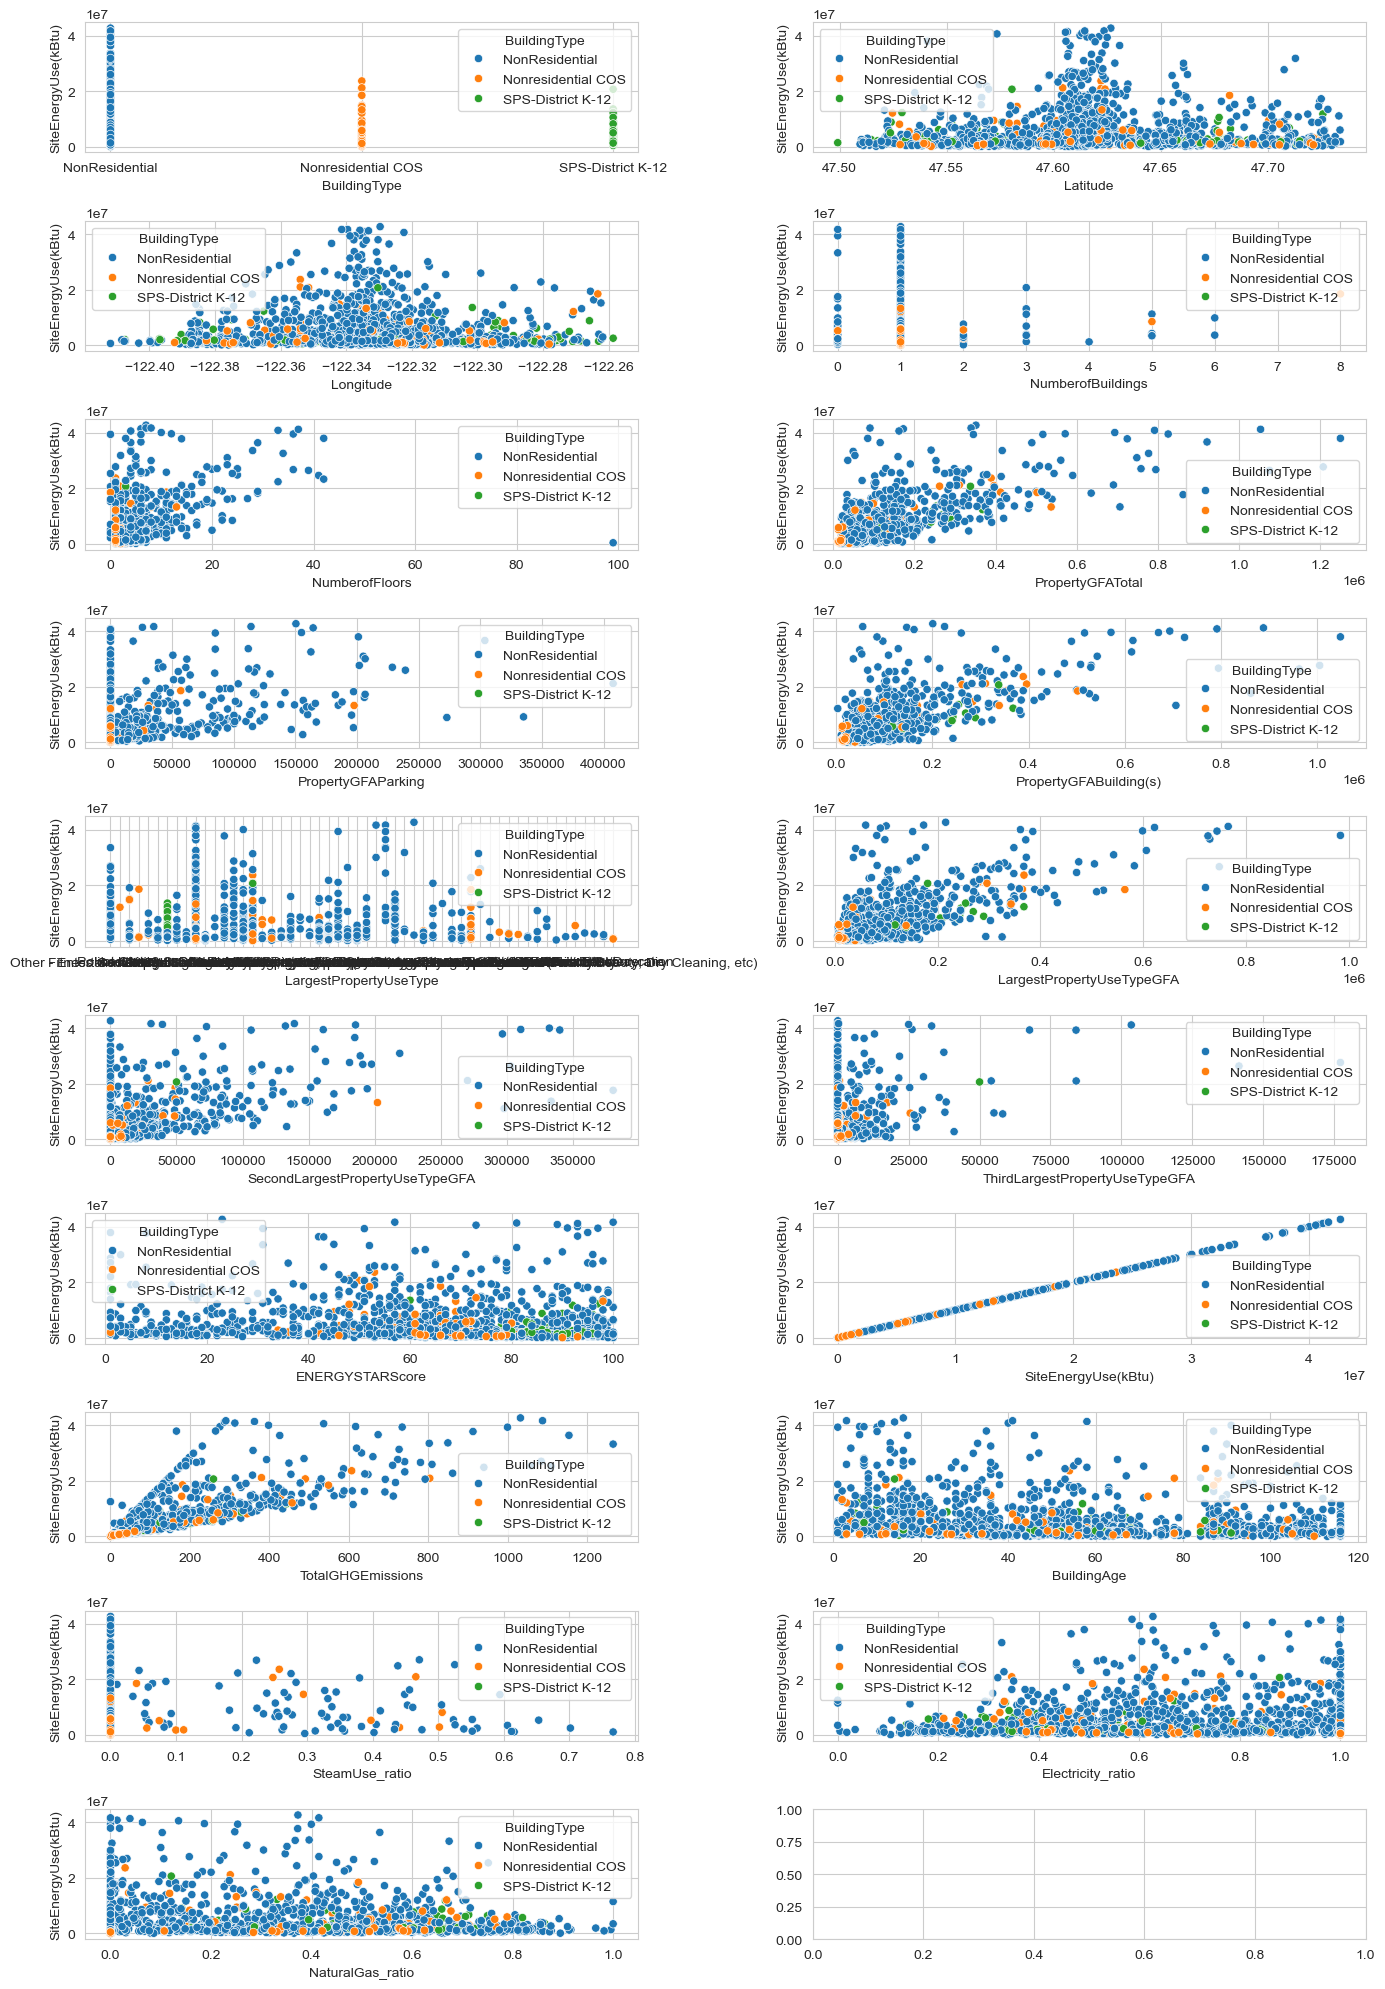

In [51]:
# Création des scatterplots pour chaque variable en fonction de la consommation totale d'énergie
fig,ax = plt.subplots(nrows = 10, ncols=2, figsize=(14,20))
row = 0
col = 0
for i in range(len(buildingEnergy.columns)):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.scatterplot(x = buildingEnergy[buildingEnergy.columns[i]] , y = buildingEnergy['SiteEnergyUse(kBtu)'], hue = buildingEnergy['BuildingType'], ax= axes)
    col += 1
plt.tight_layout()
plt.show()

# Analyse des relations entre les variables explicatives et la variable cible émission totale des GES 'TotalGHGEmissions'

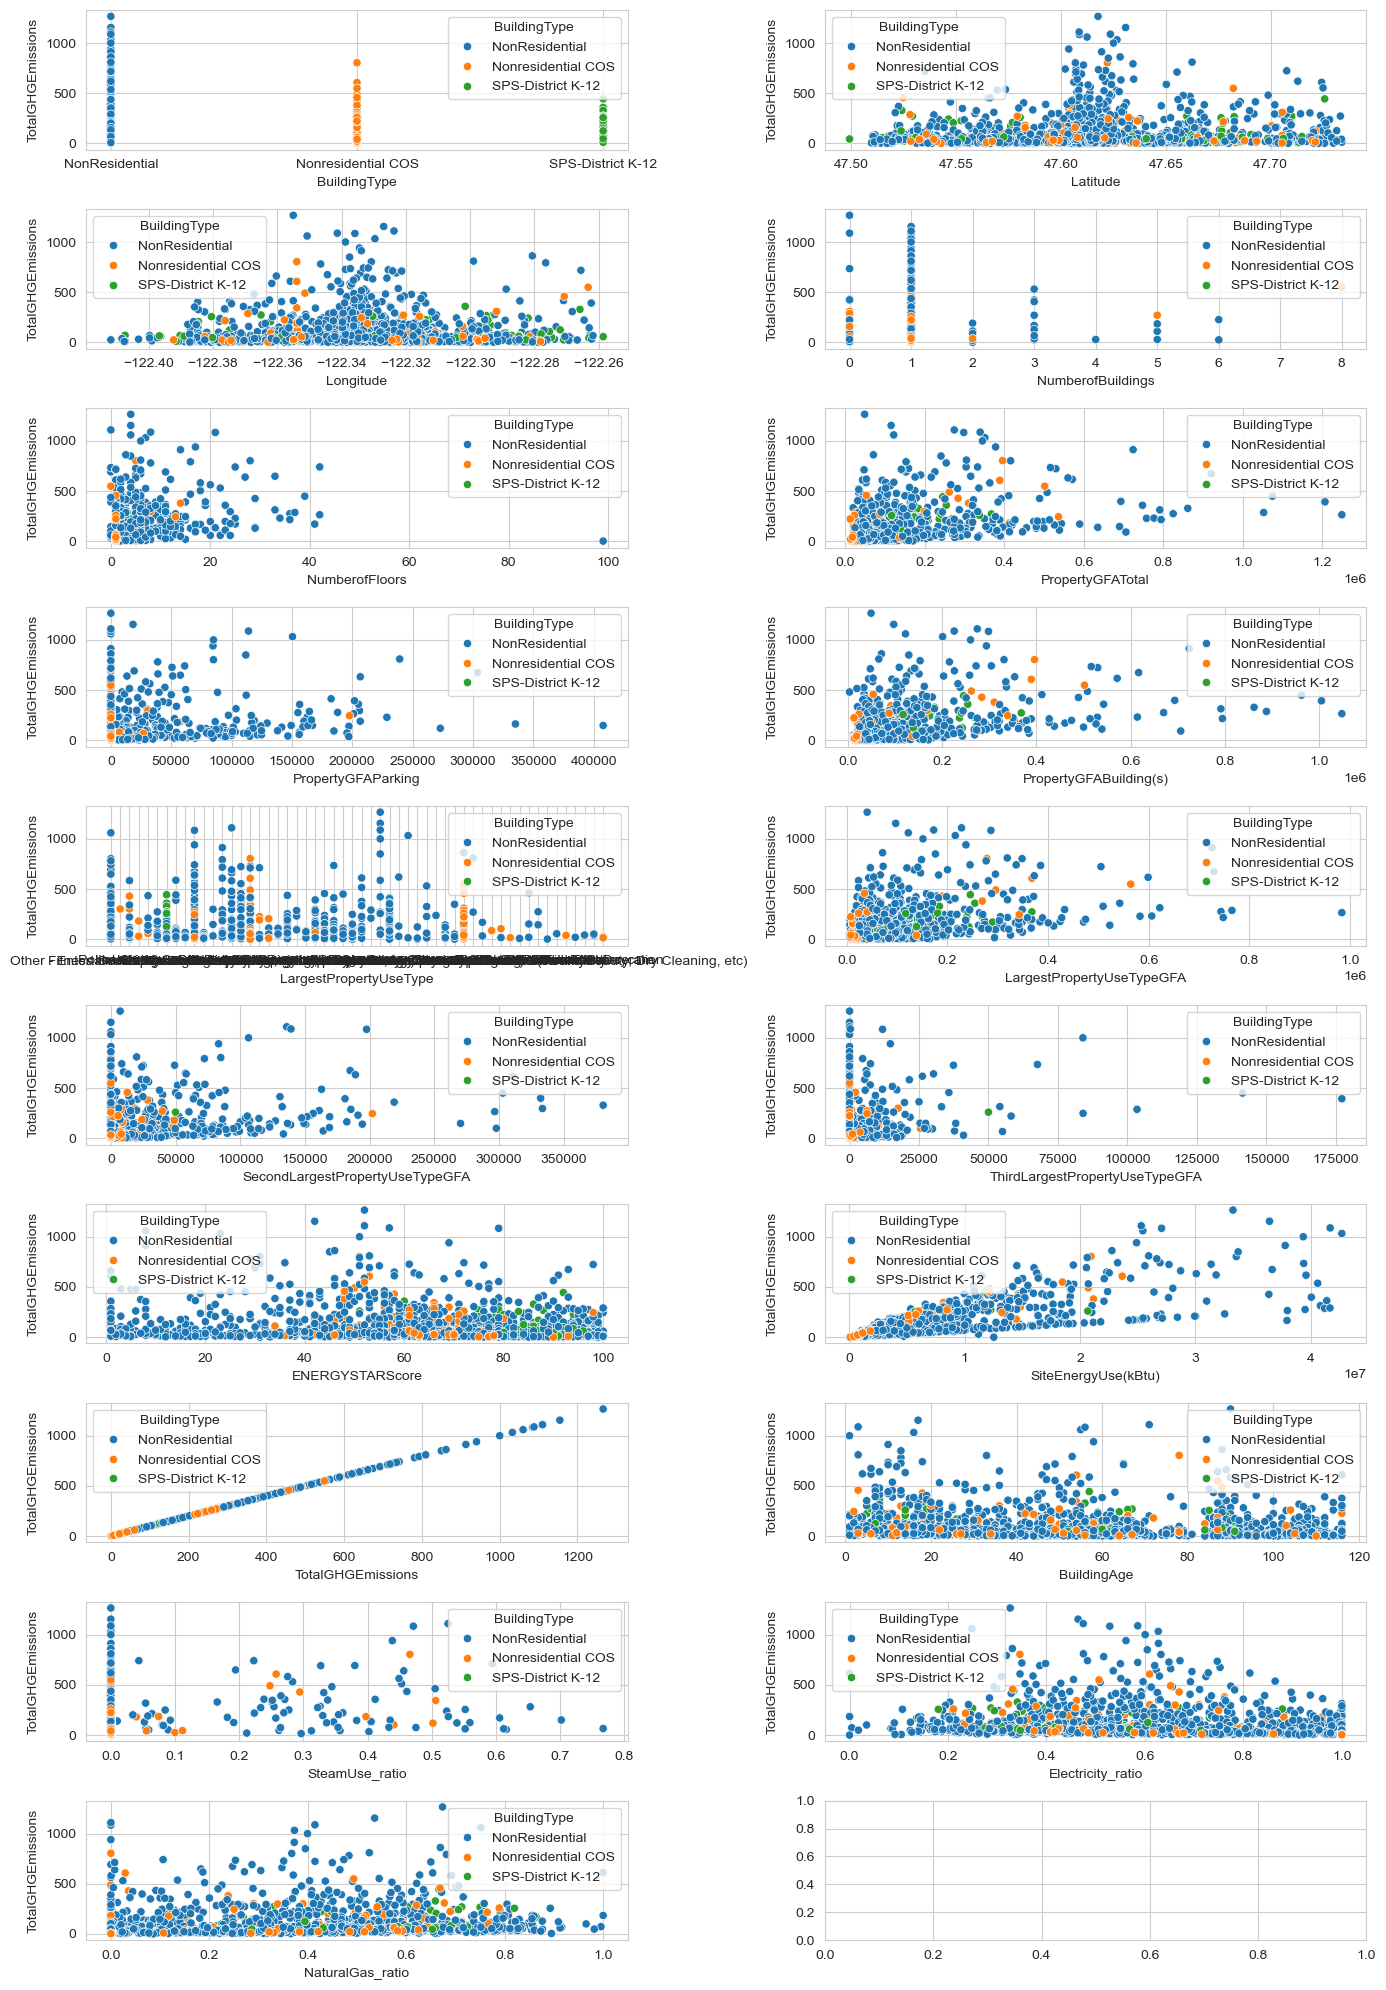

In [52]:
# Création des scatterplots pour chaque variable en fonction de l'émission des GES
fig,ax = plt.subplots(nrows = 10, ncols=2, figsize=(14,20))
row = 0
col = 0
for i in range(len(buildingEnergy.columns)):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.scatterplot(x = buildingEnergy[buildingEnergy.columns[i]], y = buildingEnergy['TotalGHGEmissions'] , ax = axes, hue=buildingEnergy['BuildingType'])
    col += 1
plt.tight_layout()
plt.show()

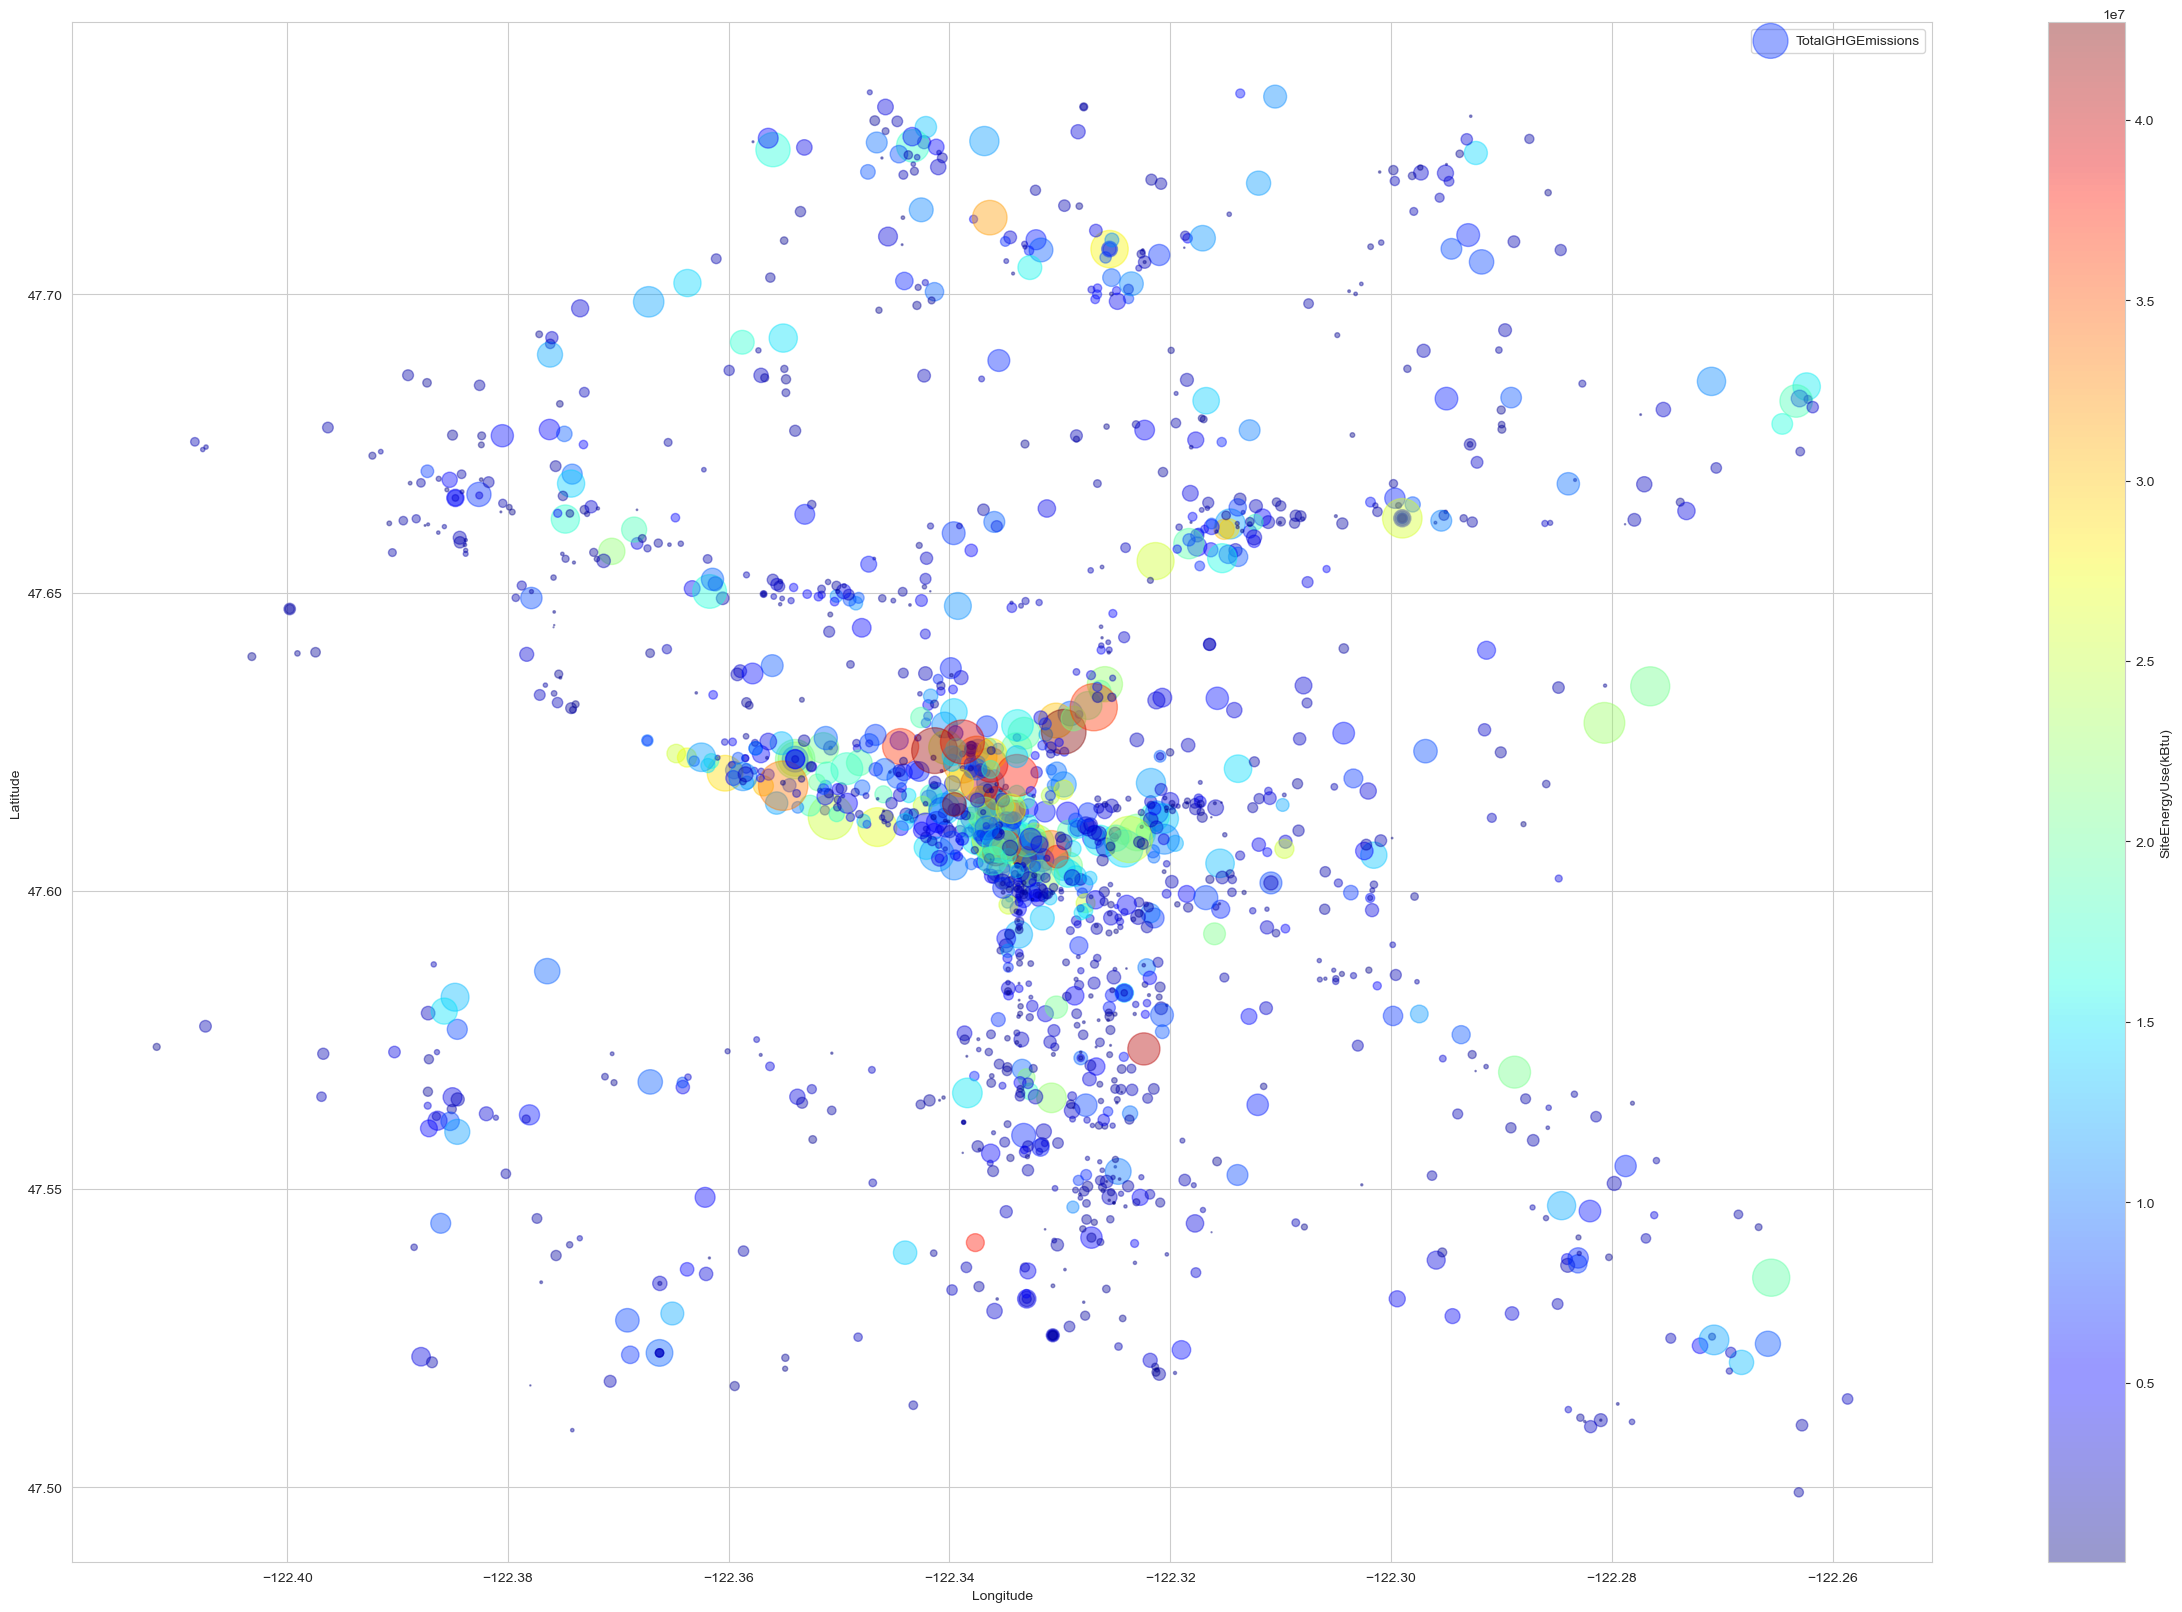

In [53]:
# Géolocalisation des bâtiments en mettant en évidence la consommation totale d'énergie et le niveau d'émissions de GES

buildingEnergy.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
            s=buildingEnergy["TotalGHGEmissions"], label="TotalGHGEmissions",
            c="SiteEnergyUse(kBtu)", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(30,20))
plt.show()

'''Nous observons une forte concentration de bâtiments au centre. Les bâtiments les plus énergivores se trouvent au centre de la carte. Nous n'observons cependant aucune information particulière
quant à la localisation des bâtiment et leur volume d'émission de GES'''

<Axes: >

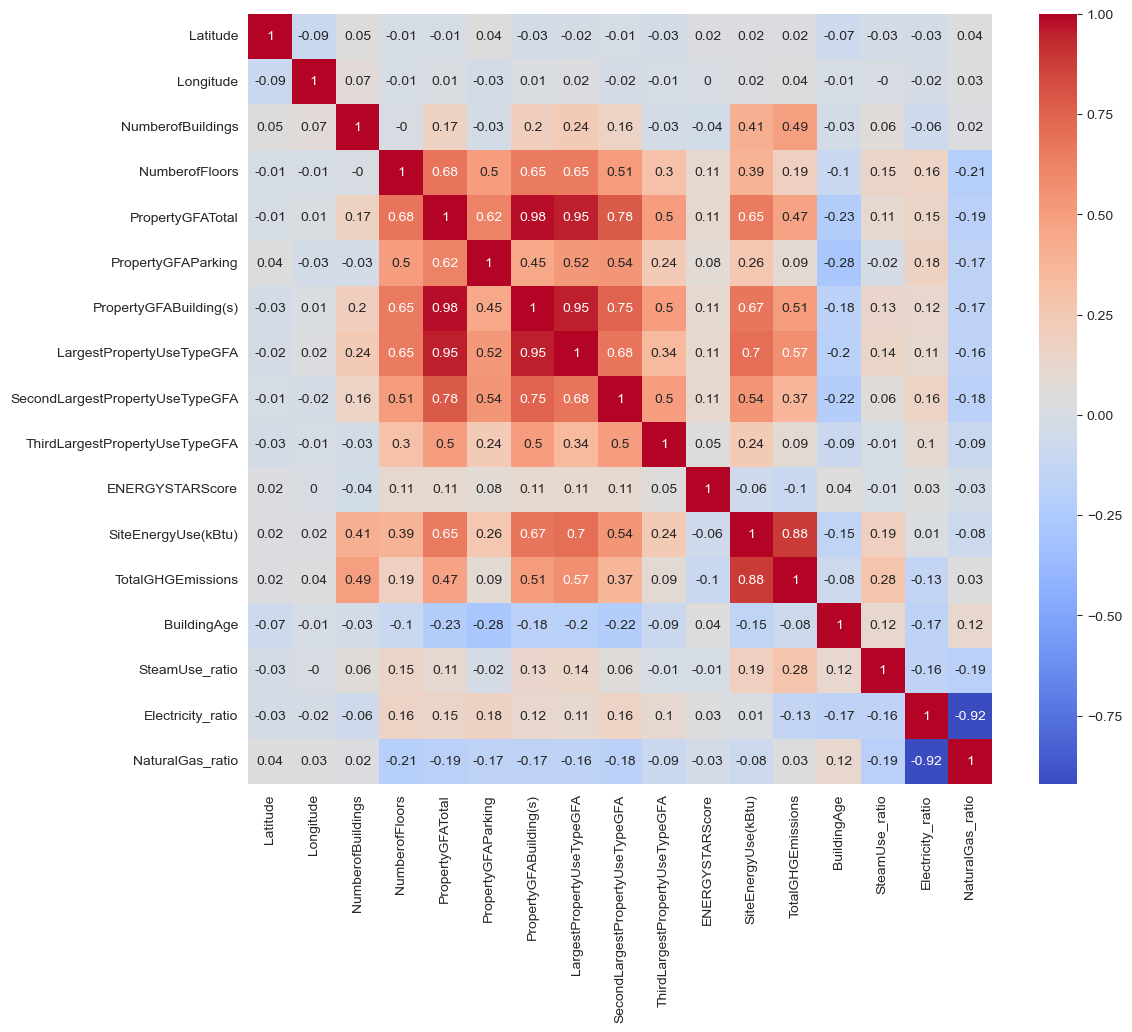

In [54]:
# Calcul de la matrice des corrélations
corr_matrix = round(data_num.corr(),2)

plt.figure(figsize=(12,10))

# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [55]:
# Extraction des variables ayant une corrélation supérieure à 0.6 avec la variable cible 'SiteEnergyUse(kBtu)'

corr_threshold = 0.6
corr_vars = corr_matrix[abs(corr_matrix["SiteEnergyUse(kBtu)"])> corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable cible 'SiteEnergyUse(kBtu)'
print("Variables ayant une corrélation supérieure à 0.6 avec la variable cible 'SiteEnergyUse(kBtu)' :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable cible 'SiteEnergyUse(kBtu)' :

['PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']


In [56]:
# Extraction des variables ayant une corrélation supérieure à 0.6 avec la variable cible 'TotalGHGEmissions'

corr_threshold = 0.6
corr_vars = corr_matrix[abs(corr_matrix["TotalGHGEmissions"])> corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable cible 'TotalGHGEmissions'
print("Variables ayant une corrélation supérieure à 0.6 avec la variable cible 'TotalGHGEmissions' :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable cible 'TotalGHGEmissions' :

['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']


In [57]:
# Extraction des variables ayant une corrélation inférieure à -0.6 avec la variable cible 'SiteEnergyUse(kBtu)'

corr_threshold = -0.6
corr_vars = corr_matrix[abs(corr_matrix["SiteEnergyUse(kBtu)"])< corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation inférieure à -0.6 avec la variable cible 'SiteEnergyUse(kBtu)'
print("Variables ayant une corrélation inférieure à 0.6 avec la variable cible 'SiteEnergyUse(kBtu)' :\n")
print(corr_vars)

Variables ayant une corrélation inférieure à 0.6 avec la variable cible 'SiteEnergyUse(kBtu)' :

[]


In [58]:
# Extraction des variables ayant une corrélation inférieure à -0.6 avec la variable cible 'TotalGHGEmissions'

corr_threshold = -0.6
corr_vars = corr_matrix[abs(corr_matrix["SiteEnergyUse(kBtu)"])< corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation inférieure à -0.6 avec la variable cible 'TotalGHGEmissions'
print("Variables ayant une corrélation inférieure à 0.6 avec la variable cible 'TotalGHGEmissions' :\n")
print(corr_vars)

Variables ayant une corrélation inférieure à 0.6 avec la variable cible 'TotalGHGEmissions' :

[]


In [59]:
# Extraction des couples de variables ayant une corrélation supérieure à 0.8

corr_threshold = 0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col])> corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)
# Affichage des couples de variables ayant une corrélation supérieure 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs)>0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

PropertyGFATotal - PropertyGFABuilding(s)
PropertyGFATotal - LargestPropertyUseTypeGFA
PropertyGFABuilding(s) - PropertyGFATotal
PropertyGFABuilding(s) - LargestPropertyUseTypeGFA
LargestPropertyUseTypeGFA - PropertyGFATotal
LargestPropertyUseTypeGFA - PropertyGFABuilding(s)
SiteEnergyUse(kBtu) - TotalGHGEmissions
TotalGHGEmissions - SiteEnergyUse(kBtu)
Electricity_ratio - NaturalGas_ratio
NaturalGas_ratio - Electricity_ratio


'''Pour les couples de variables explicatives identifiés ici, nous devons faire attention de ne retenir qu'une des variables sur 2 afin d'éviter les problèmes de multicolinéarité
dans les modèles que nous allons implémenter.'''

In [60]:
# Extraction des couples de variables ayant une corrélation inférieure à -0.8

corr_threshold = -0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[(corr_matrix[col])< corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)
            
# Affichage des couples de variables ayant une corrélation inférieure -0.8
print("Couples de variables ayant une corrélation inférieure à -0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs)>0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation inférieure à -0.8 :

Electricity_ratio - NaturalGas_ratio
NaturalGas_ratio - Electricity_ratio


In [61]:
buildingEnergy["LargestPropertyUseType"].unique().tolist()

['Hotel',
 'Police Station',
 'Other - Entertainment/Public Assembly',
 'Library',
 'Fitness Center/Health Club/Gym',
 'Social/Meeting Hall',
 'K-12 School',
 'College/University',
 'Automobile Dealership',
 'Office',
 'Self-Storage Facility',
 'Other - Mall',
 'Senior Care Community',
 'Medical Office',
 'Retail Store',
 'Other',
 'Museum',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Other - Lodging/Residential',
 'Residence Hall/Dormitory',
 'Other/Specialty Hospital',
 'Financial Office',
 'Non-Refrigerated Warehouse',
 'Distribution Center',
 'Parking',
 'Multifamily Housing',
 'Worship Facility',
 'Restaurant',
 'Data Center',
 'Laboratory',
 'Supermarket/Grocery Store',
 'Urgent Care/Clinic/Other Outpatient',
 'Hospital (General Medical & Surgical)',
 'Other - Services',
 'Strip Mall',
 'Wholesale Club/Supercenter',
 'Refrigerated Warehouse',
 'Manufacturing/Industrial Plant',
 'Other - Recreation',
 'Lifestyle Center',
 'Other - Public Services',
 'Fire Station',
 'Per

In [62]:
# Regroupement des observations de la variable 'LargestPropertyUseType' afin de ne pas créer trop de variables lors de l'encodage

# Création des listes pour effectuer le regroupement

Liste1 = ['Hotel','Other - Lodging/Residential','Residence Hall/Dormitory'] # Hotel
Liste2 = ['Police Station','Courthouse','Other - Public Services','Fire Station','Other - Utility','Prison/Incarceration'] # Administration
Liste3 = ['Other - Entertainment/Public Assembly','Museum','Performing Arts','Movie Theater'] # Culture
Liste4 = ['Library','K-12 School','College/University','Other - Education','Adult Education','Pre-school/Daycare'] # Education
Liste5 = ['Fitness Center/Health Club/Gym','Other - Recreation','Lifestyle Center','Personal Services (Health/Beauty, Dry Cleaning, etc)'] # Well-being
Liste6 = ['Social/Meeting Hall','Office','Financial Office','C,onvention Center','Bank Branch'] # Office
Liste7 = ['Other','Other - Services'] # Other
Liste8 = ['Automobile Dealership','Other - Mall','Retail Store','Repair Services (Vehicle, Shoe, Locksmith, etc)','Supermarket/Grocery Store','Strip Mall'] # Stores
Liste9 = ['Self-Storage Facility','Non-Refrigerated Warehouse','Distribution Center','Wholesale Club/Supercenter','Refrigerated Warehouse'] # Warehouse
Liste10 = ['Senior Care Community','Medical Office','Hospital (General Medical & Surgical)','Other/Specialty Hospital','Laboratory','Urgent Care/Clinic/Other Outpatient','Residential Care Facility'] # Healthcare
Liste11 = ['Multifamily Housing'] # Housing
Liste12 = ['Restaurant','Other - Restaurant/Bar','Food Service'] # Catering
Liste13 = ['Manufacturing/Industrial Plant'] # Factory

# Regroupement des observations 

buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste1)),'LargestPropertyUseType']='Hotel'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste2)),'LargestPropertyUseType']='Administration'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste3)),'LargestPropertyUseType']='Culture'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste4)),'LargestPropertyUseType']='Education'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste5)),'LargestPropertyUseType']='Well-being'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste6)),'LargestPropertyUseType']='Office'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste7)),'LargestPropertyUseType']='Other'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste8)),'LargestPropertyUseType']='Stores'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste9)),'LargestPropertyUseType']='Warehouse'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste10)),'LargestPropertyUseType']='Healthcare'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste11)),'LargestPropertyUseType']='Housing'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste12)),'LargestPropertyUseType']='Catering'
buildingEnergy.loc[(buildingEnergy['LargestPropertyUseType'].isin(Liste13)),'LargestPropertyUseType']='Factory'


In [63]:
buildingEnergy["LargestPropertyUseType"].unique().tolist()

['Hotel',
 'Administration',
 'Culture',
 'Education',
 'Well-being',
 'Office',
 'Stores',
 'Warehouse',
 'Healthcare',
 'Other',
 'Parking',
 'Housing',
 'Worship Facility',
 'Catering',
 'Data Center',
 'Factory']

In [64]:
buildingEnergy.reset_index(inplace=True)

In [65]:
buildingEnergy.head()

OSEBuildingID        BuildingType  Latitude  Longitude  NumberofBuildings  \
0             1      NonResidential  47.61220 -122.33799                1.0   
1             2      NonResidential  47.61317 -122.33393                1.0   
2             5      NonResidential  47.61412 -122.33664                1.0   
3             8      NonResidential  47.61375 -122.34047                1.0   
4             9  Nonresidential COS  47.61623 -122.33657                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0              12             88434                   0   
1              11            103566               15064   
2              10             61320                   0   
3              18            175580               62000   
4               2             97288               37198   

   PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                   88434                  Hotel                    88434.0   
1                   88502                  Hotel                    83880.0   
2                   61320                  Hotel                    61320.0   
3                  113580                  Hotel                   123445.0   
4                   60090         Administration                    88830.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              0.0                             0.0   
1                          15064.0                          4622.0   
2                              0.0                             0.0   
3                          68009.0                             0.0   
4                              0.0                             0.0   

   ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  BuildingAge  \
0             60.0            7226362.5             249.98           89   
1             61.0            8387933.0             295.86           20   
2             56.0            6794584.0             286.43           90   
3             75.0           14172606.0             505.01           36   
4             57.0           12086616.0             301.81           17   

   SteamUse_ratio  Electricity_ratio  NaturalGas_ratio  
0        0.277302           0.546060          0.176638  
1        0.000000           0.386609          0.613391  
2        0.325913           0.407519          0.266567  
3        0.000000           0.378802          0.621198  
4        0.000000           0.609884          0.390116

In [66]:
data_for_encoding = buildingEnergy.loc[:,['LargestPropertyUseType','BuildingType']]
data_for_encoding

LargestPropertyUseType        BuildingType
0                     Hotel      NonResidential
1                     Hotel      NonResidential
2                     Hotel      NonResidential
3                     Hotel      NonResidential
4            Administration  Nonresidential COS
...                     ...                 ...
1566                 Office  Nonresidential COS
1567             Well-being  Nonresidential COS
1568             Well-being  Nonresidential COS
1569             Well-being  Nonresidential COS
1570             Well-being  Nonresidential COS

[1571 rows x 2 columns]

In [67]:
# Encodage de les variables catégorielles 'LargestPropertyUseType' et 'BuildingType' avec One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first') # Nous supprimons la première modamlité pour éviter la collinéarité
ohe_result = ohe.fit_transform(data_for_encoding[['LargestPropertyUseType','BuildingType']])
data_for_encoding_ohe = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(['LargestPropertyUseType','BuildingType']))
print("One-hot encoding : ")
display(data_for_encoding_ohe)

One-hot encoding : 


LargestPropertyUseType_Catering  LargestPropertyUseType_Culture  \
0                                 0.0                             0.0   
1                                 0.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   
...                               ...                             ...   
1566                              0.0                             0.0   
1567                              0.0                             0.0   
1568                              0.0                             0.0   
1569                              0.0                             0.0   
1570                              0.0                             0.0   

      LargestPropertyUseType_Data Center  LargestPropertyUseType_Education  \
0                                    0.0                               0.0   
1                                    0.0                               0.0   
2                                    0.0                               0.0   
3                                    0.0                               0.0   
4                                    0.0                               0.0   
...                                  ...                               ...   
1566                                 0.0                               0.0   
1567                                 0.0                               0.0   
1568                                 0.0                               0.0   
1569                                 0.0                               0.0   
1570                                 0.0                               0.0   

      LargestPropertyUseType_Factory  LargestPropertyUseType_Healthcare  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   
...                              ...                                ...   
1566                             0.0                                0.0   
1567                             0.0                                0.0   
1568                             0.0                                0.0   
1569                             0.0                                0.0   
1570                             0.0                                0.0   

      LargestPropertyUseType_Hotel  LargestPropertyUseType_Housing  \
0                              1.0                             0.0   
1                              1.0                             0.0   
2                              1.0                             0.0   
3                              1.0                             0.0   
4                              0.0                             0.0   
...                            ...                             ...   
1566                           0.0                             0.0   
1567                           0.0                             0.0   
1568                           0.0                             0.0   
1569                           0.0                             0.0   
1570                           0.0                             0.0   

      LargestPropertyUseType_Office  LargestPropertyUseType_Other  \
0                               0.0                           0.0   
1                               0.0                           0.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               0.0                           0.0   
...                             ... 

In [68]:
# Suppression des variables encodées

buildingEnergy = buildingEnergy.drop(["LargestPropertyUseType","BuildingType"],axis=1)
buildingEnergy

OSEBuildingID  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0                1  47.61220 -122.33799                1.0              12   
1                2  47.61317 -122.33393                1.0              11   
2                5  47.61412 -122.33664                1.0              10   
3                8  47.61375 -122.34047                1.0              18   
4                9  47.61623 -122.33657                1.0               2   
...            ...       ...        ...                ...             ...   
1566         50222  47.56722 -122.31154                1.0               1   
1567         50223  47.59625 -122.32283                1.0               1   
1568         50224  47.63644 -122.35784                1.0               1   
1569         50225  47.52832 -122.32431                1.0               1   
1570         50226  47.53939 -122.29536                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2                61320                   0                   61320   
3               175580               62000                  113580   
4                97288               37198                   60090   
...                ...                 ...                     ...   
1566             12294                   0                   12294   
1567             16000                   0                   16000   
1568             13157                   0                   13157   
1569             14101                   0                   14101   
1570             18258                   0                   18258   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                       88434.0                              0.0   
1                       83880.0                          15064.0   
2                       61320.0                              0.0   
3                      123445.0                          68009.0   
4                       88830.0                              0.0   
...                         ...                              ...   
1566                    12294.0                              0.0   
1567                    16000.0                              0.0   
1568                     7583.0                           5574.0   
1569                     6601.0                           6501.0   
1570                     8271.0                           8000.0   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
0                                0.0             60.0         7.226362e+06   
1                             4622.0             61.0         8.387933e+06   
2                                0.0             56.0         6.794584e+06   
3                                0.0             75.0         1.417261e+07   
4                                0.0             57.0         1.208662e+07   
...                              ...              ...                  ...   
1566                             0.0             46.0         8.497457e+05   
1567                             0.0             70.0         9.502762e+05   
1568                             0.0             71.0         5.765898e+06   
1569                           484.0             70.0         7.194712e+05   
1570                          1108.0             62.0         1.152896e+06   

      TotalGHGEmissions  BuildingAge  SteamUse_ratio  Electricity_ratio  \
0                249.98           89        0.277302           0.546060   
1                295.86           20        0.000000           0.386609   
2                286.43           90        0.325913           0.407519   
3                505.01           36        0.000000           0.378802   
4                301.81           17        0.000000           0.609884   
...                 ...

In [69]:
# Regroupement de l'ensemble des données dans une seule dataframe

Building = pd.concat([buildingEnergy,data_for_encoding_ohe],axis=1)
Building

OSEBuildingID  Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0                1  47.61220 -122.33799                1.0              12   
1                2  47.61317 -122.33393                1.0              11   
2                5  47.61412 -122.33664                1.0              10   
3                8  47.61375 -122.34047                1.0              18   
4                9  47.61623 -122.33657                1.0               2   
...            ...       ...        ...                ...             ...   
1566         50222  47.56722 -122.31154                1.0               1   
1567         50223  47.59625 -122.32283                1.0               1   
1568         50224  47.63644 -122.35784                1.0               1   
1569         50225  47.52832 -122.32431                1.0               1   
1570         50226  47.53939 -122.29536                1.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2                61320                   0                   61320   
3               175580               62000                  113580   
4                97288               37198                   60090   
...                ...                 ...                     ...   
1566             12294                   0                   12294   
1567             16000                   0                   16000   
1568             13157                   0                   13157   
1569             14101                   0                   14101   
1570             18258                   0                   18258   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ...  \
0                       88434.0                              0.0  ...   
1                       83880.0                          15064.0  ...   
2                       61320.0                              0.0  ...   
3                      123445.0                          68009.0  ...   
4                       88830.0                              0.0  ...   
...                         ...                              ...  ...   
1566                    12294.0                              0.0  ...   
1567                    16000.0                              0.0  ...   
1568                     7583.0                           5574.0  ...   
1569                     6601.0                           6501.0  ...   
1570                     8271.0                           8000.0  ...   

      LargestPropertyUseType_Housing  LargestPropertyUseType_Office  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
1566                             0.0                            1.0   
1567                             0.0                            0.0   
1568                             0.0                            0.0   
1569                             0.0                            0.0   
1570                             0.0                            0.0   

      LargestPropertyUseType_Other  LargestPropertyUseType_Parking  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                              0.0                             0.0   
...                            ...                             ...   
1566   

In [70]:
# Les variables 'PropertyGFATotal','PropertyGFAParking' et 'PropertyGFABuilding(s)' sont fortement liées en effet GFATotal = GFAParking + GFABuilding(s)
'''Nous décidons de supprimer la variable 'PropertyGFATotal afin d'éviter toute collinéarité'''

Building = Building.drop(columns=['PropertyGFATotal'], axis=1)

In [71]:
# Les variables 'LargestPropertyUseTypeGFA' et 'PropertyGFABuilding(s)' sont très forte corrélées entre elles, nous décidons de supprimer la variable 'LargestPropertyUseTypeGFA'.  

Building = Building.drop(columns=['LargestPropertyUseTypeGFA'], axis=1)

In [72]:
# Les variables 'Electricity_ratio' et 'NaturalGas_ratio' présentent entre elles une très forte corrélation négative. Nous décidons de supprimer la variable 'NaturalGas_ratio'.

Building = Building.drop(columns=['NaturalGas_ratio'], axis=1)

In [73]:
# Utiliser la variable 'OSEBuildingID' d'identitification des bâtiments comme index de notre data frame

Building.set_index("OSEBuildingID", inplace=True)

In [74]:
Building.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1571 entries, 1 to 50226
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Latitude                                 1571 non-null   float64
 1   Longitude                                1571 non-null   float64
 2   NumberofBuildings                        1571 non-null   float64
 3   NumberofFloors                           1571 non-null   int64  
 4   PropertyGFAParking                       1571 non-null   int64  
 5   PropertyGFABuilding(s)                   1571 non-null   int64  
 6   SecondLargestPropertyUseTypeGFA          1571 non-null   float64
 7   ThirdLargestPropertyUseTypeGFA           1571 non-null   float64
 8   ENERGYSTARScore                          1571 non-null   float64
 9   SiteEnergyUse(kBtu)                      1571 non-null   float64
 10  TotalGHGEmissions                        1571 non-nu

In [75]:
Building.isna().sum()

Latitude                                   0
Longitude                                  0
NumberofBuildings                          0
NumberofFloors                             0
PropertyGFAParking                         0
PropertyGFABuilding(s)                     0
SecondLargestPropertyUseTypeGFA            0
ThirdLargestPropertyUseTypeGFA             0
ENERGYSTARScore                            0
SiteEnergyUse(kBtu)                        0
TotalGHGEmissions                          0
BuildingAge                                0
SteamUse_ratio                             0
Electricity_ratio                          0
LargestPropertyUseType_Catering            0
LargestPropertyUseType_Culture             0
LargestPropertyUseType_Data Center         0
LargestPropertyUseType_Education           0
LargestPropertyUseType_Factory             0
LargestPropertyUseType_Healthcare          0
LargestPropertyUseType_Hotel               0
LargestPropertyUseType_Housing             0
LargestPro

In [76]:
Building.head()

Latitude  Longitude  NumberofBuildings  NumberofFloors  \
OSEBuildingID                                                           
1              47.61220 -122.33799                1.0              12   
2              47.61317 -122.33393                1.0              11   
5              47.61412 -122.33664                1.0              10   
8              47.61375 -122.34047                1.0              18   
9              47.61623 -122.33657                1.0               2   

               PropertyGFAParking  PropertyGFABuilding(s)  \
OSEBuildingID                                               
1                               0                   88434   
2                           15064                   88502   
5                               0                   61320   
8                           62000                  113580   
9                           37198                   60090   

               SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                    
1                                          0.0   
2                                      15064.0   
5                                          0.0   
8                                      68009.0   
9                                          0.0   

               ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  \
OSEBuildingID                                                    
1                                         0.0             60.0   
2                                      4622.0             61.0   
5                                         0.0             56.0   
8                                         0.0             75.0   
9                                         0.0             57.0   

               SiteEnergyUse(kBtu)  ...  LargestPropertyUseType_Housing  \
OSEBuildingID                       ...                                   
1                        7226362.5  ...                             0.0   
2                        8387933.0  ...                             0.0   
5                        6794584.0  ...                             0.0   
8                       14172606.0  ...                             0.0   
9                       12086616.0  ...                             0.0   

               LargestPropertyUseType_Office  LargestPropertyUseType_Other  \
OSEBuildingID                                                                
1                                        0.0                           0.0   
2                                        0.0                           0.0   
5                                        0.0                           0.0   
8                                        0.0                           0.0   
9                                        0.0                           0.0   

               LargestPropertyUseType_Parking  LargestPropertyUseType_Stores  \
OSEBuildingID                                                                  
1                                         0.0                            0.0   
2                                         0.0                            0.0   
5                                         0.0                            0.0   
8                                         0.0                            0.0   
9                                         0.0                            0.0   

               LargestPropertyUseType_Warehouse  \
OSEBuildingID                                     
1                                           0.0   
2                                           0.0   
5                                           0.0   
8                                           0.0   
9                                           0.0   

               LargestPropertyUseType_Well-being  \
OSEBuildingID                                      
1                                            0.0   
2                                            0.0   
5                                            0.0   
8        

In [77]:
# Extraction des différents data frame nécessaires pour la construction des modèles (consommation et émissions)

In [78]:
# Pour la construction du modèle de prédiction de la consommation totale d'énergie nous excluons les variables 'ENERGYSTARScore' et 'TotalGHGEmissions'

EnergyUse = Building.drop(columns=["ENERGYSTARScore","TotalGHGEmissions"], axis=1)

# Pour la construction du modèle de prédiction de la consommation totale d'énergie nous excluons les variables 'ENERGYSTARScore' et 'TotalGHGEmissions' 

GHGEmissions = Building.drop(columns=["SiteEnergyUse(kBtu)"],axis=1)

In [79]:
# Extraction des différents data frame afin de les utiliser dans les notebooks de prédiction

EnergyUse.to_csv('EnergyUse.csv')
GHGEmissions.to_csv('GHGEmissions.csv')

In [80]:
Building.describe().T

count          mean           std  \
Latitude                                 1571.0  4.761609e+01  4.853839e-02   
Longitude                                1571.0 -1.223330e+02  2.469276e-02   
NumberofBuildings                        1571.0  1.014004e+00  4.265787e-01   
NumberofFloors                           1571.0  3.711012e+00  5.195221e+00   
PropertyGFAParking                       1571.0  1.118304e+04  3.544274e+04   
PropertyGFABuilding(s)                   1571.0  8.009118e+04  1.048321e+05   
SecondLargestPropertyUseTypeGFA          1571.0  1.460592e+04  3.700212e+04   
ThirdLargestPropertyUseTypeGFA           1571.0  2.017665e+03  8.759412e+03   
ENERGYSTARScore                          1571.0  6.504583e+01  2.423274e+01   
SiteEnergyUse(kBtu)                      1571.0  5.210508e+06  6.903208e+06   
TotalGHGEmissions                        1571.0  1.061692e+02  1.557337e+02   
BuildingAge                              1571.0  5.461235e+01  3.275836e+01   
SteamUse_ratio                           1571.0  1.866505e-02  8.624389e-02   
Electricity_ratio                        1571.0  6.970903e-01  2.651376e-01   
LargestPropertyUseType_Catering          1571.0  8.911521e-03  9.400921e-02   
LargestPropertyUseType_Culture           1571.0  1.718651e-02  1.300073e-01   
LargestPropertyUseType_Data Center       1571.0  1.273074e-03  3.566880e-02   
LargestPropertyUseType_Education         1571.0  9.293444e-02  2.904330e-01   
LargestPropertyUseType_Factory           1571.0  4.455761e-03  6.662381e-02   
LargestPropertyUseType_Healthcare        1571.0  5.092298e-02  2.199105e-01   
LargestPropertyUseType_Hotel             1571.0  6.174411e-02  2.407668e-01   
LargestPropertyUseType_Housing           1571.0  7.001910e-03  8.341050e-02   
LargestPropertyUseType_Office            1571.0  3.176321e-01  4.657038e-01   
LargestPropertyUseType_Other             1571.0  5.983450e-02  2.372555e-01   
LargestPropertyUseType_Parking           1571.0  1.591343e-02  1.251805e-01   
LargestPropertyUseType_Stores            1571.0  1.005729e-01  3.008581e-01   
LargestPropertyUseType_Warehouse         1571.0  1.858689e-01  3.891247e-01   
LargestPropertyUseType_Well-being        1571.0  2.482495e-02  1.556409e-01   
LargestPropertyUseType_Worship Facility  1571.0  4.519414e-02  2.077959e-01   
BuildingType_Nonresidential COS          1571.0  5.346913e-02  2.250387e-01   
BuildingType_SPS-District K-12           1571.0  5.346913e-02  2.250387e-01   

                                                 min           25%  \
Latitude                                    47.49917  4.758437e+01   
Longitude                                 -122.41182 -1.223436e+02   
NumberofBuildings                            0.00000  1.000000e+00   
NumberofFloors                               0.00000  1.000000e+00   
PropertyGFAParking                           0.00000  0.000000e+00   
PropertyGFABuilding(s)                    3636.00000  2.781900e+04   
SecondLargestPropertyUseTypeGFA              0.00000  0.000000e+00   
ThirdLargestPropertyUseTypeGFA               0.00000  0.000000e+00   
ENERGYSTARScore                              1.00000  5.300000e+01   
SiteEnergyUse(kBtu)                      16808.90039  1.216333e+06   
TotalGHGEmissions                            0.00000  1.958500e+01   
BuildingAge                                  1.00000  2.800000e+01   
SteamUse_ratio                               0.00000  0.000000e+00   
Electricity_ratio                            0.00000  4.858442e-01   
LargestPropertyUseType_Catering              0.00000  0.000000e+00   
LargestPropertyUseType_Culture               0.00000  0.000000e+00   
LargestPropertyUseType_Data Center           0.00000  0.000000e+00   
LargestPropertyUseType_Education             0.00000  0.000000e+00   
LargestPropertyUseType_Factory               0.00000  0.000000e+00   
LargestPropertyUseType_Healthcare            0.00000  0.000000e+00   
LargestPropertyUseType_Hotel               